In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6,4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import KNNImputer

from sklearn.tree import export_graphviz, export_text
from sklearn import tree

from sklearn.metrics import mean_absolute_error, PredictionErrorDisplay
import sklearn
sklearn.set_config(transform_output="pandas")


In [2]:
!pip install category_encoders -q

In [3]:
car_df = pd.read_csv('./adverts.csv')

In [4]:
car_df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [5]:
car_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [6]:
car_df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [7]:
car_df.loc[car_df['price'] >100000]


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
113,202009103575016,1568.0,19,Black,McLaren,Senna,USED,2019.0,585000,Coupe,False,Petrol
362,202005279588456,10.0,NaN,Blue,Land Rover,Range Rover,NEW,NaN,102473,SUV,False,Diesel
383,202007141227859,1.0,NaN,Black,BMW,X6M,NEW,NaN,107490,SUV,False,Petrol
395,202008092275974,16050.0,14,Black,Ferrari,458,USED,2014.0,139990,Coupe,False,Petrol
461,202009143722697,10600.0,64,Silver,Rolls-Royce,Wraith,USED,2014.0,117500,Coupe,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
401532,202010064684488,0.0,NaN,NaN,Land Rover,Range Rover,NEW,NaN,103265,SUV,False,Diesel
401566,202010134939512,552.0,69,Red,Ferrari,488 Pista,USED,2019.0,310830,Coupe,False,Petrol
401708,202002217579329,3000.0,19,Green,Mercedes-Benz,G Class,USED,2019.0,141950,SUV,False,Petrol
401716,202003308800352,900.0,16,Yellow,Lamborghini,Aventador,USED,2016.0,279990,Convertible,False,Petrol


In [8]:
car_df['reg_code'].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

In [9]:
car_df.corr()

,public_reference,mileage,year_of_registration,price,crossover_car_and_van
public_reference,1.000000,0.034941,0.021617,-0.052344,-0.026169
mileage,0.034941,1.000000,-0.375541,-0.160204,0.033543
year_of_registration,0.021617,-0.375541,1.000000,0.102341,-0.011155
price,-0.052344,-0.160204,0.102341,1.000000,0.010402
crossover_car_and_van,-0.026169,0.033543,-0.011155,0.010402,1.000000


In [10]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [11]:
car_df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [12]:
car_df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [13]:
car_df.describe().round(2)

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.00,368694.00,402005.00
mean,2.020071e+14,37743.60,2015.01,17341.97
std,1.691662e+10,34831.72,7.96,46437.46
min,2.013072e+14,0.00,999.00,120.00
25%,2.020090e+14,10481.00,2013.00,7495.00
50%,2.020093e+14,28629.50,2016.00,12600.00
75%,2.020102e+14,56875.75,2018.00,20000.00
max,2.020110e+14,999999.00,2020.00,9999999.00


In [14]:
car_df.shape

(402005, 12)

In [15]:
car_df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [16]:
car_df['year_of_registration'].describe()

#The min year, is an incorrect values

count    368694.000000
mean       2015.006206
std           7.962667
min         999.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64

In [17]:
car_df['vehicle_condition'].value_counts()

USED    370756
NEW      31249
Name: vehicle_condition, dtype: int64

In [18]:
car_df['crossover_car_and_van'].value_counts()

False    400210
True       1795
Name: crossover_car_and_van, dtype: int64

In [19]:
car_df[['standard_make']].value_counts()

#BMW car were mostly sold

standard_make
BMW              37376
Audi             35280
Volkswagen       34246
Vauxhall         33700
Mercedes-Benz    31917
                 ...  
Pagani               1
Panther              1
Reliant              1
Radical              1
International        1
Length: 110, dtype: int64

In [20]:
car_df['fuel_type'].value_counts()

#Higher number of Petrol Vehicles were mostly sold

Petrol                   216929
Diesel                   158120
Petrol Hybrid             13602
Petrol Plug-in Hybrid      6160
Electric                   4783
Diesel Hybrid              1403
Bi Fuel                     221
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: fuel_type, dtype: int64

In [21]:
# car_df['vehicle_condition'].value_counts()

In [22]:
# I can deduce here that all new vehicles are not registered
# The mileage can be used to determined if a vehicle is new or not
# All new vehicles have their mileage below 100
mil = car_df[car_df['vehicle_condition']=='NEW'] #31249
mil[mil['mileage']<=100]
#Also they are all less than 100

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
17,201911043995897,5.0,NaN,NaN,Nissan,X-Trail,NEW,NaN,27595,SUV,False,Diesel
19,202008272998331,0.0,NaN,White,Volkswagen,T-Cross,NEW,NaN,25000,SUV,False,Petrol
37,202001306737473,0.0,NaN,White,Fiat,Panda,NEW,NaN,13999,Hatchback,False,Petrol
44,202003178531910,0.0,NaN,NaN,Honda,Civic,NEW,NaN,19495,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
401860,202010024501227,10.0,NaN,Silver,Mitsubishi,Shogun Sport,NEW,NaN,31999,SUV,False,Diesel
401890,202010104843364,5.0,NaN,Red,BMW,Z4,NEW,NaN,47910,Convertible,False,Petrol
401902,202010134960554,10.0,NaN,White,BMW,3 Series,NEW,NaN,35023,Saloon,False,Petrol
401905,202010144983518,0.0,NaN,Red,Land Rover,Range Rover Evoque,NEW,NaN,44995,SUV,False,Petrol


In [23]:
car_df.corr()

,public_reference,mileage,year_of_registration,price,crossover_car_and_van
public_reference,1.000000,0.034941,0.021617,-0.052344,-0.026169
mileage,0.034941,1.000000,-0.375541,-0.160204,0.033543
year_of_registration,0.021617,-0.375541,1.000000,0.102341,-0.011155
price,-0.052344,-0.160204,0.102341,1.000000,0.010402
crossover_car_and_van,-0.026169,0.033543,-0.011155,0.010402,1.000000


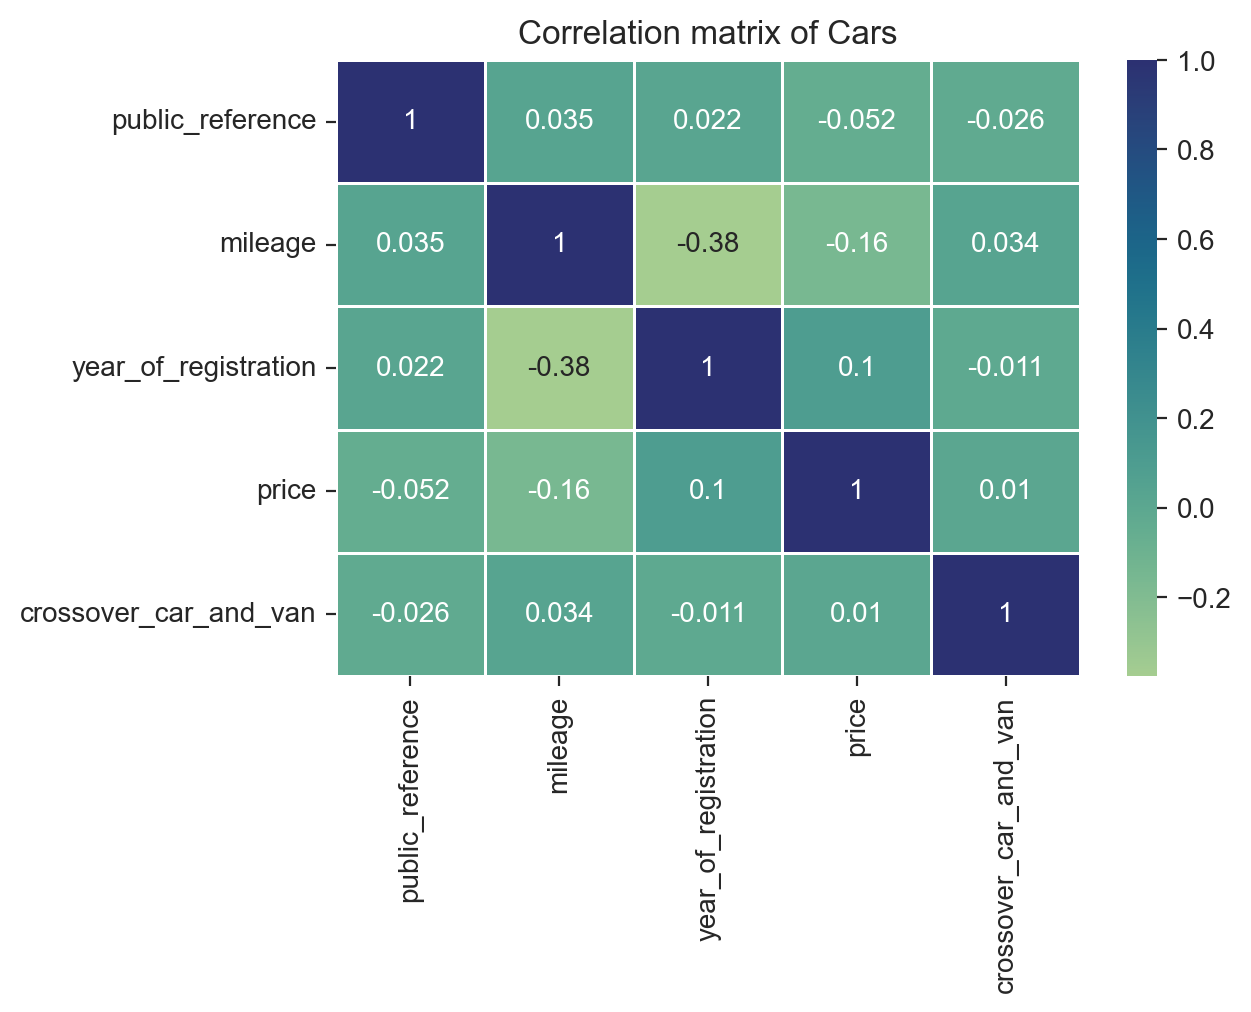

In [24]:
sns.heatmap(car_df.corr(), annot=True, cmap='crest', linewidth=.5);
plt.title('Correlation matrix of Cars');
plt.show();

#these are quantitative features, and their correlation are measure using heatmap to visualize

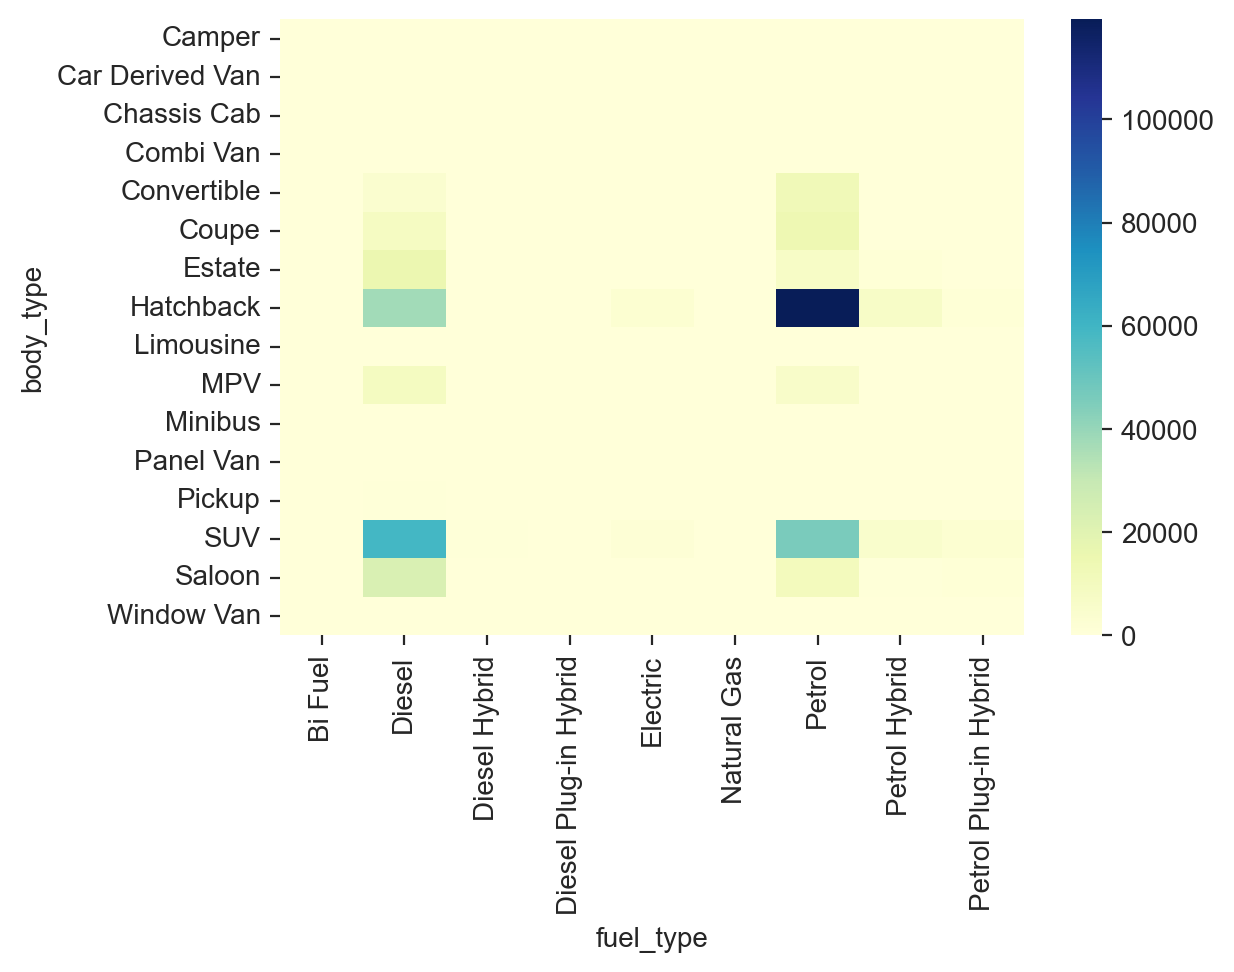

In [25]:
#To visualize the categorical volumns, it has been seen above
#the heatmap plotted for numerical columns
# Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
#        'standard_make', 'standard_model', 'vehicle_condition',
#        'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
#        'fuel_type'],
#       dtype='object')

#categorical features
cat_col = [ 'standard_colour',
           'standard_make', 'standard_model', 
           'body_type','vehicle_condition', 'fuel_type' ]
cat_car_df = car_df[cat_col]
# cat_car_df.head()
cross_tab = pd.crosstab(cat_car_df['body_type'], cat_car_df['fuel_type'])


sns.heatmap(cross_tab, cmap='YlGnBu');

#This indicates that the hatchback using petrol are mostly the most purchased vehicle

In [26]:
car_df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

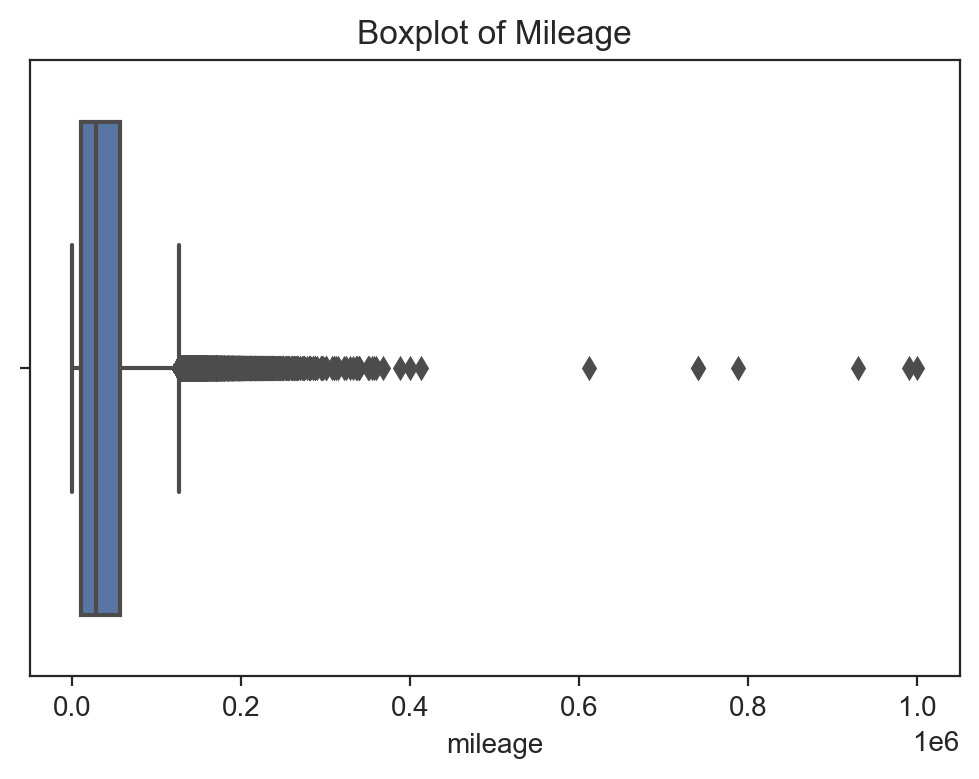

In [27]:
sns.boxplot(data=car_df, x='mileage');
plt.title('Boxplot of Mileage');
# The median is around 28000 mileage, the interquatile range is bwtween 10000 and 55000


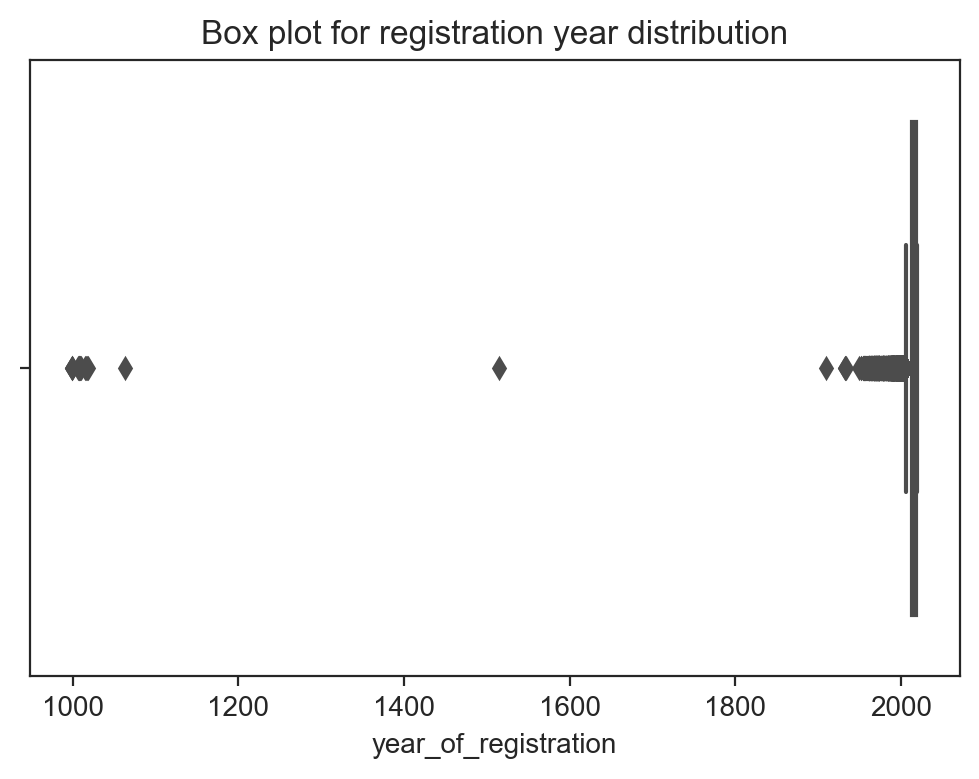

In [28]:
sns.boxplot(data=car_df, x='year_of_registration');
plt.title('Box plot for registration year distribution');
#The plot shows that there are outliers and this data needs cleaning
#The max price is around 1000000

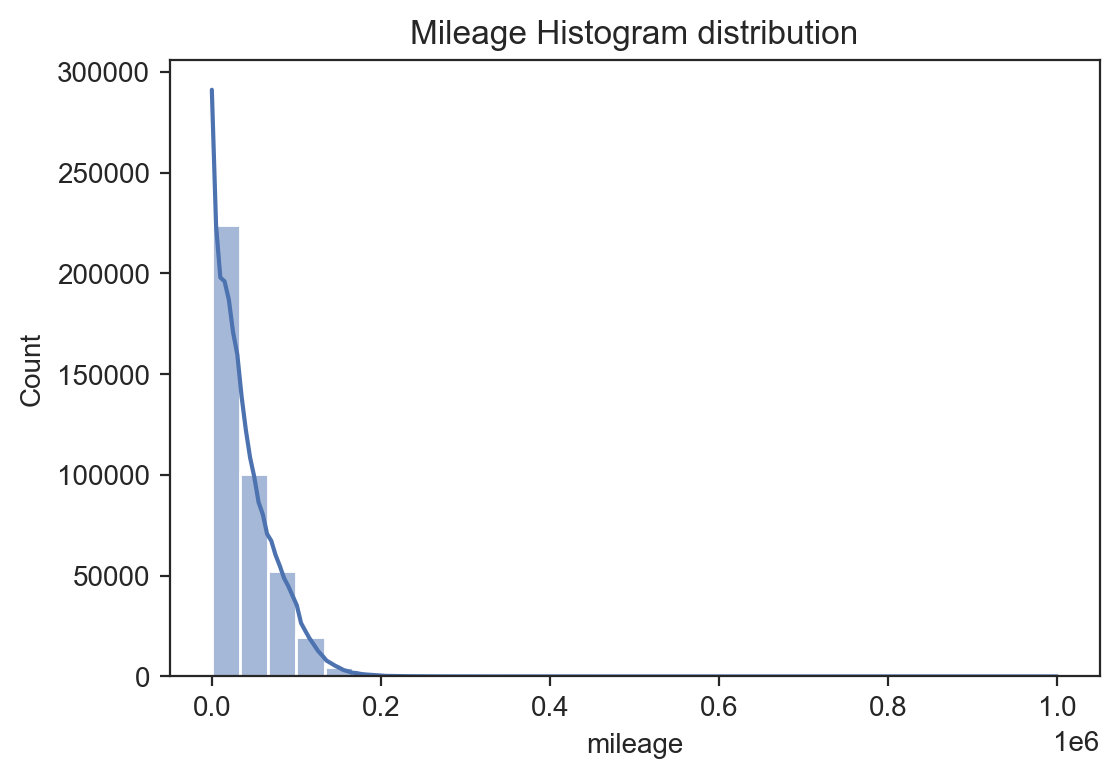

In [29]:
sns.histplot(car_df['mileage'], bins=30, kde=True);
plt.title('Mileage Histogram distribution');

#The frequency decreasees as the mileage increases

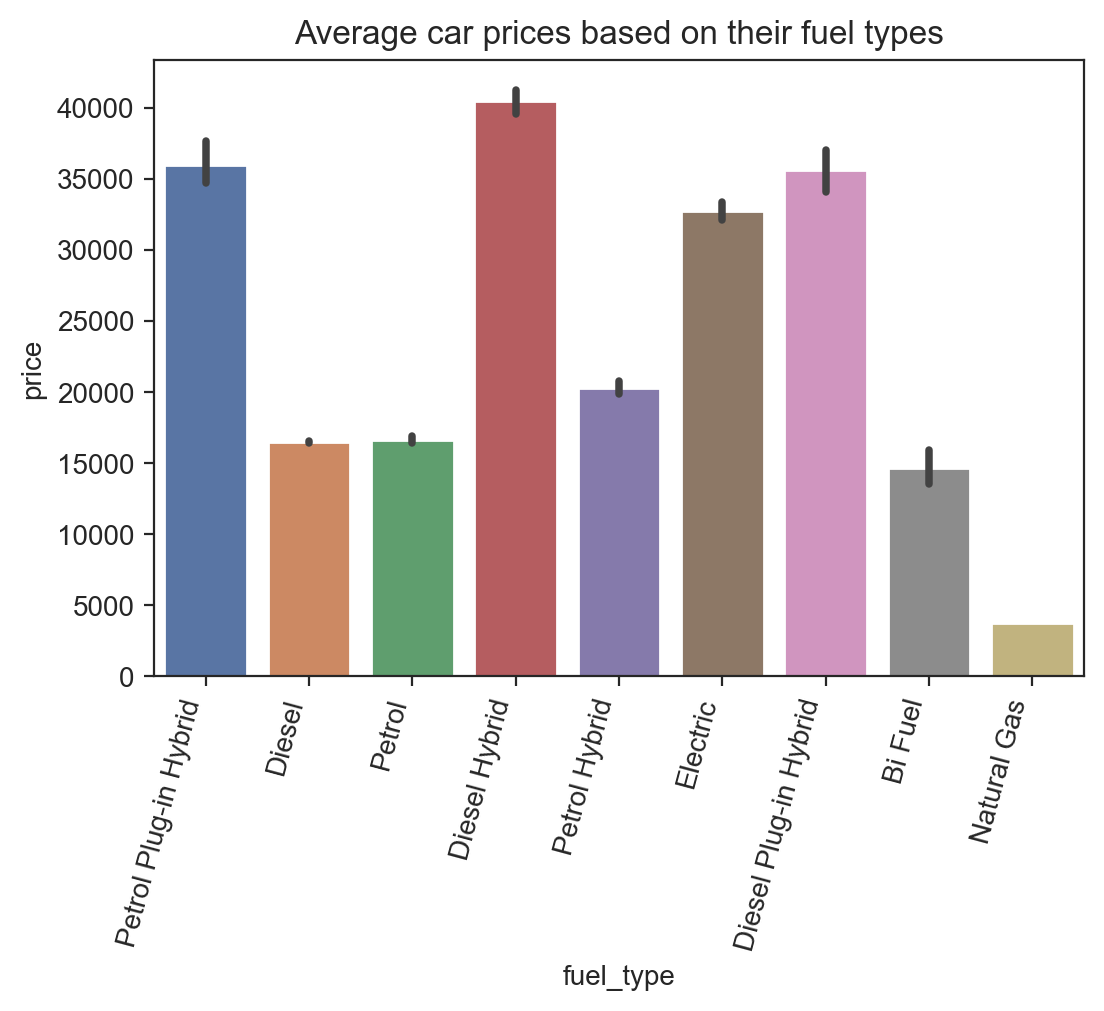

In [30]:
ax = sns.barplot(data=car_df, x='fuel_type', y='price');
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right");
plt.title('Average car prices based on their fuel types');
plt.show();


#This plot shows that Diesel Hybrid cars are more expensive 
# while bi fuel are cheaper, checking the average price 

In [31]:
car_df.loc[car_df['fuel_type'] == 'Diesel Hybrid'].mean()

public_reference         2.020072e+14
mileage                  1.491120e+04
year_of_registration     2.018292e+03
price                    4.046916e+04
crossover_car_and_van    0.000000e+00
dtype: float64

DATA PROCESSING FOR MACHINE LEARNING

In [32]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [33]:
# fig, ax = plt.subplots(1, 3, figsize=(6,4))
# sns.boxplot(data=car_df, x='mileage', y='price', ax=ax[0])
# sns.boxplot(data=car_df, x='mileage', y='price', ax=ax[1])
# sns.boxplot(data=car_df, x='mileage', y='price', ax=ax[2])

In [34]:
car_df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

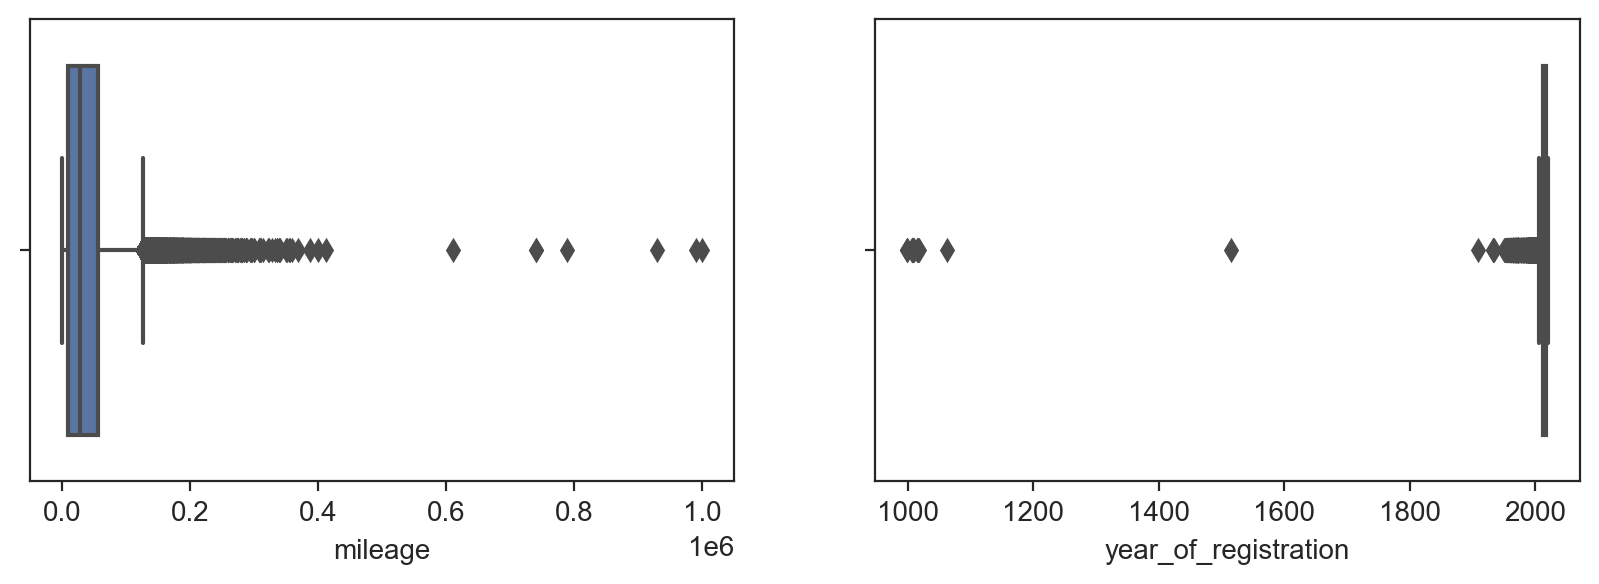

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10,3));
sns.boxplot(data=car_df, x='mileage', ax=ax[0]);
sns.boxplot(data=car_df, x='year_of_registration', ax=ax[1]); 
# sns.boxplot(data=car_df, x='price', ax=ax[1]);


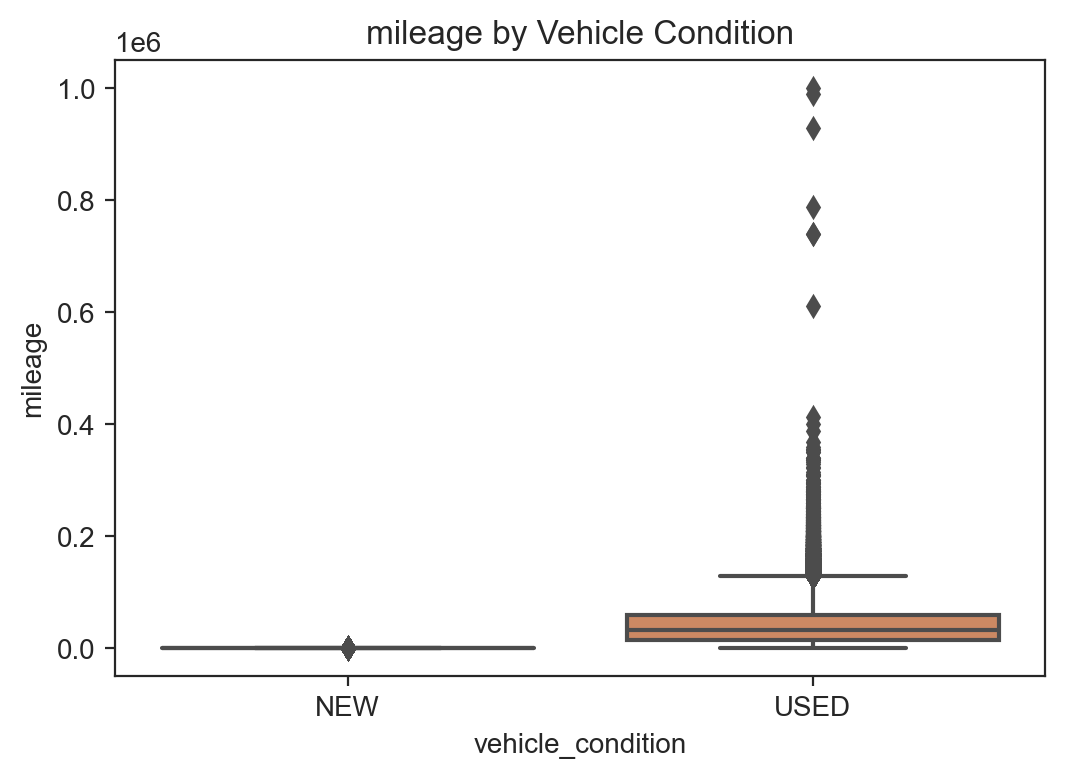

In [36]:
sns.boxplot(data=car_df, x='vehicle_condition', y='mileage')
# ax.set_xticklabels(rotation=75, ha="right")
plt.title("mileage by Vehicle Condition")

plt.show()

In [37]:
car_df.query('year_of_registration <= 2000')

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
25,202008042070611,49585.0,B,NaN,Ferrari,308,USED,1984.0,54475,Convertible,False,Petrol
280,202010185150348,171000.0,W,Red,Toyota,Yaris Verso,USED,2000.0,495,Hatchback,False,Petrol
312,202010265438664,44163.0,W,Silver,Volkswagen,Beetle,USED,2000.0,1100,Hatchback,False,Petrol
426,202009033275983,175000.0,J,Blue,Mercedes-Benz,SEC Series,USED,1991.0,19990,Coupe,False,Petrol
667,201912024961333,99000.0,X,Blue,Volvo,V40,USED,2000.0,1295,Estate,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
400664,202006109989307,5800.0,A,Blue,Fiat,500,USED,1963.0,9500,Saloon,False,Petrol
400710,202008142471790,150000.0,R,Green,Toyota,Picnic,USED,1998.0,1495,MPV,False,Petrol
400724,202008242879192,0.0,L,Silver,Porsche,911,USED,1973.0,175000,NaN,False,Petrol
401128,202009203972304,36000.0,M,White,Rolls-Royce,Silver Shadow,USED,1973.0,7495,Saloon,False,Petrol


In [38]:
car_df['mileage'].describe()

count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64

<Axes: xlabel='mileage', ylabel='Count'>

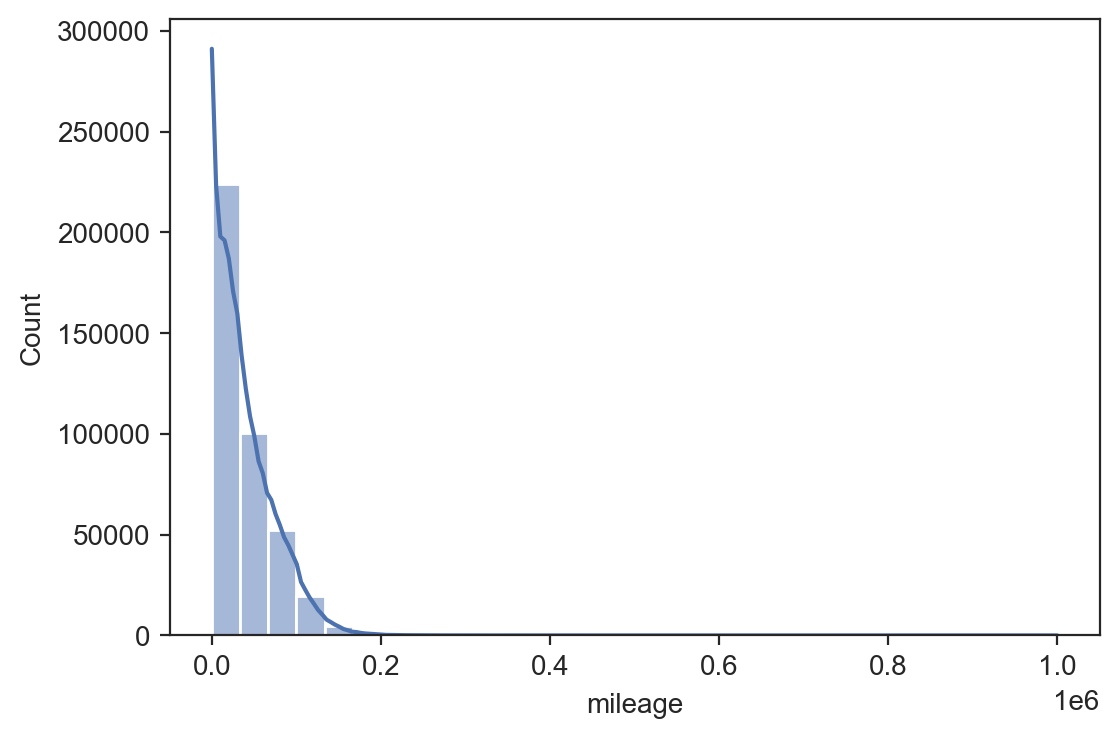

In [39]:
sns.histplot(data = car_df, x='mileage', bins=30,kde=True)


In [40]:
# Removing outliers using in the mileage feature, this is positively skewed

Q1 = car_df['mileage'].quantile(0.25)
Q3 = car_df['mileage'].quantile(0.75)
IQR = Q3 - Q1
car_df = car_df[(car_df['mileage'] >= Q1 - 1.5 * IQR) & (car_df['mileage'] <= Q3 + 1.5 * IQR)]
print("lower_limit:" ,Q1 - 1.5 * IQR, "upper_limit: ", Q3 + 1.5 * IQR)

lower_limit: -59111.125 upper_limit:  126467.875


<Axes: xlabel='mileage'>

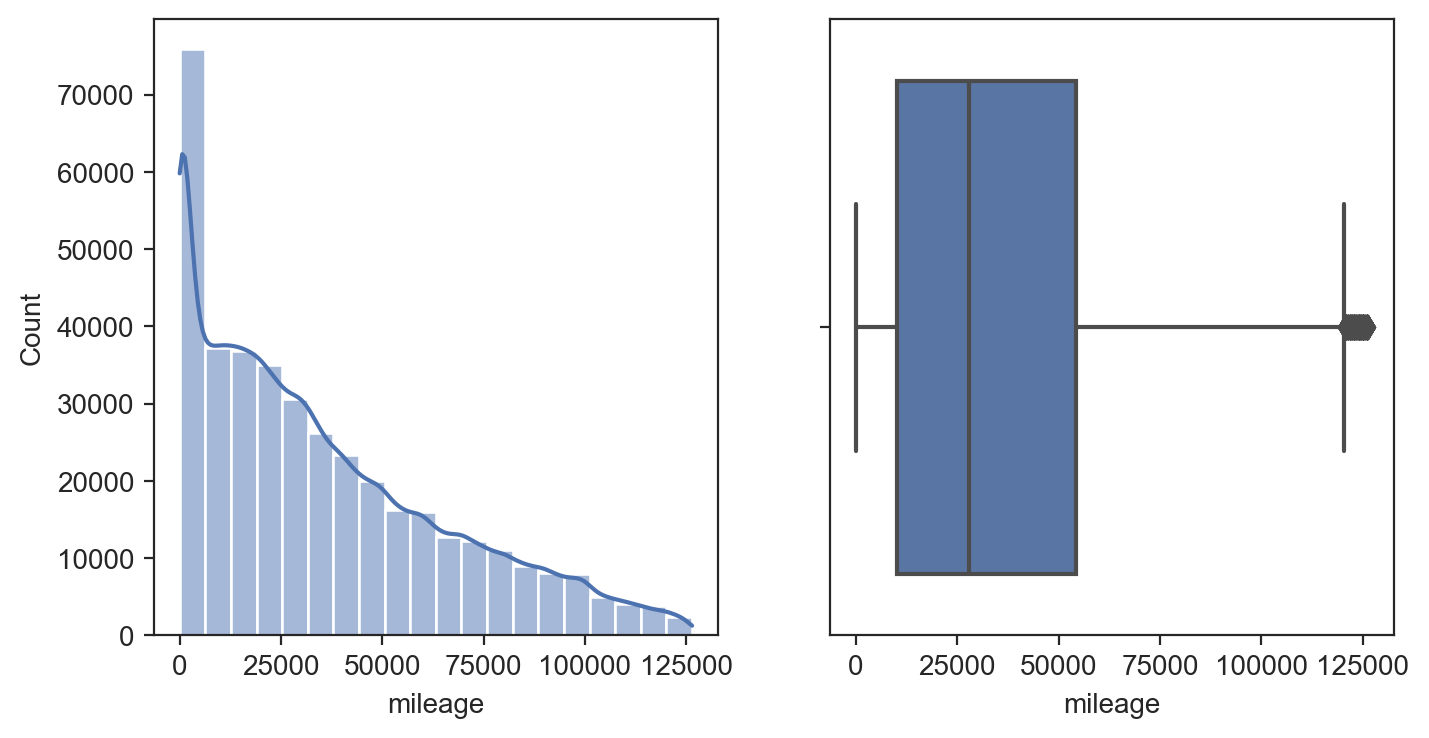

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4));
sns.histplot(data = car_df, x='mileage', bins=20,kde=True, ax=ax[0])
sns.boxplot(x=car_df['mileage'], ax=ax[1])

In [42]:
# Q1 = car_df['year_of_registration'].quantile(0.25)
# Q3 = car_df['year_of_registration'].quantile(0.75)
# IQR = Q3 - Q1
# car_df = car_df[(car_df['year_of_registration'] >= Q1 - 3 * IQR) & (car_df['year_of_registration'] <= Q3 + 3 * IQR)]


In [43]:
#All new cars with no year of reg has been replaced with 2021
#since all new vehicles were not registered and has no reg_code

#Here i want to fill in the null in the year of registeration for vehicles that are new,
#since the max year of the car_df is 2020, so i can fill in the year of new cars with 2021
#therefore any cars having 2021 is new
car_df.loc[(car_df['year_of_registration'].isnull()) & (car_df['vehicle_condition'] == 'NEW'), 
           'year_of_registration'] = 2021

In [44]:
#I will extract the missing year of registration from the reg_code

ext_year = car_df[car_df['year_of_registration'].isnull() 
       & car_df['reg_code'].str.isdigit()]


In [45]:
ext_year['reg_code'] = ext_year['reg_code'].astype('int64')

In [46]:
mask = ext_year['reg_code'] >= 50
ext_year.loc[mask, 'year_of_registration'] = 2000 + (ext_year.loc[mask, 'reg_code'] - 50)

mask_2 = ext_year['reg_code'] < 50
ext_year.loc[mask_2, 'year_of_registration'] = 2000 + (ext_year.loc[mask_2, 'reg_code'])


In [47]:
#Convert back to its original data typ because we need to merge
ext_year['reg_code'] = ext_year['reg_code'].astype('object')

In [48]:
car_df.update(ext_year['year_of_registration'])


In [49]:
car_df.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31811
standard_colour           5213
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration       347
price                        0
body_type                  810
crossover_car_and_van        0
fuel_type                  590
dtype: int64

In [50]:
car_df.drop(columns=['public_reference','reg_code', 'crossover_car_and_van'], inplace=True)

In [51]:
# There might be some duplicated in the data, so let's remove it
car_df.duplicated().sum()

8717

In [52]:
car_df.drop_duplicates(inplace=True)

In [53]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384980 entries, 0 to 402004
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mileage               384980 non-null  float64
 1   standard_colour       380009 non-null  object 
 2   standard_make         384980 non-null  object 
 3   standard_model        384980 non-null  object 
 4   vehicle_condition     384980 non-null  object 
 5   year_of_registration  384635 non-null  float64
 6   price                 384980 non-null  int64  
 7   body_type             384189 non-null  object 
 8   fuel_type             384434 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 29.4+ MB


In [54]:
# Filling of missing numbers using various techinques depending on the data

#In reg code, the usage of number started in the year 2000, meaning that those before 2000 were in alphabets
# Here, I am filling the reg code and the year of registration by fillling the null values wit
#the values of the forward rows to filll in

# car_df['reg_code'].fillna(method='ffill', inplace=True)
# car_df['year_of_registration'].fillna(method='ffill', inplace=True)

#since these are categorical values, i majorly filled them with the mode values
car_df['standard_colour'].fillna(car_df['standard_colour'].mode()[0], inplace=True)
car_df['body_type'].fillna(car_df['body_type'].mode()[0], inplace=True)
car_df['fuel_type'].fillna(car_df['fuel_type'].mode()[0], inplace=True)


In [55]:
# car_df[(car_df['year_of_registration'].isnull()) & (car_df['vehicle_condition'] == 'NEW')]
#Here i want to fill in the null in the year of registeration for vehicles that are new,
#since the max year of the car_df is 2020, so i can fill in the year of new cars with 2021
#therefore any cars having 2021 is new

In [56]:
#All new cars with no year of registration has been replaced with 2021
# car_df.loc[(car_df['year_of_registration'].isnull()) & (car_df['vehicle_condition'] == 'NEW'), 
#            'year_of_registration'] = 2021


In [57]:
car_df.isnull().sum()

mileage                   0
standard_colour           0
standard_make             0
standard_model            0
vehicle_condition         0
year_of_registration    345
price                     0
body_type                 0
fuel_type                 0
dtype: int64

In [58]:
car_df['year_of_registration'].mean().round()

2016.0

In [59]:
car_df[car_df['year_of_registration'].isnull()]

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type
1510,13406.0,White,Land Rover,Range Rover Evoque,USED,NaN,26000,Coupe,Diesel
2631,1000.0,Blue,Maserati,Levante,USED,NaN,63995,SUV,Petrol
6998,160.0,Grey,McLaren,Senna,USED,NaN,699950,Coupe,Petrol
7517,11413.0,Black,MINI,Convertible,USED,NaN,14400,Convertible,Diesel
10044,73330.0,Gold,Jaguar,Mark II,USED,NaN,24990,Saloon,Petrol
...,...,...,...,...,...,...,...,...,...
396442,1298.0,Blue,Ferrari,488 Pista,USED,NaN,349975,Coupe,Petrol
396985,29000.0,Black,Lamborghini,Gallardo,USED,NaN,77990,Coupe,Petrol
398645,22312.0,Silver,Lamborghini,Diablo,USED,NaN,139750,Coupe,Petrol
399728,12812.0,Silver,Rolls-Royce,Wraith,USED,NaN,159950,Coupe,Petrol


In [60]:
#Since there are still missing year of registeration, i will employ the use of KNN imputer
cols = ['year_of_registration', 'price', 'mileage']
imputer=KNNImputer(n_neighbors=2)
imp_year = imputer.fit_transform(car_df[cols])

In [61]:
car_df['year_of_registration'] = imp_year['year_of_registration']

In [62]:
car_df.isnull().sum()

mileage                 0
standard_colour         0
standard_make           0
standard_model          0
vehicle_condition       0
year_of_registration    0
price                   0
body_type               0
fuel_type               0
dtype: int64

In [63]:
# We can create a new features of knowing the age of a car
car_df['vehicle_age'] = (2022 - car_df['year_of_registration'])

In [64]:
# car_df.drop(columns=['crossover_car_and_van', 'standard_colour'], inplace=True)



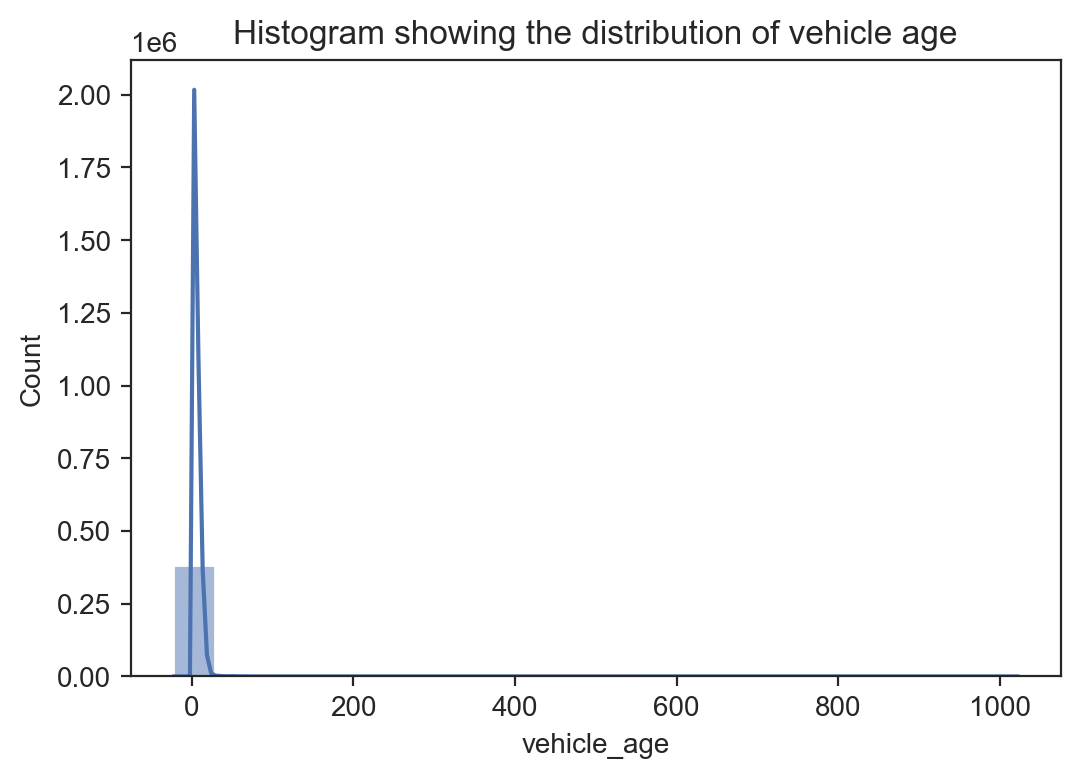

In [65]:
# let's check for outliers in the age
sns.histplot(data = car_df, x='vehicle_age', bins=20,kde=True)
plt.title("Histogram showing the distribution of vehicle age");
#This is positively skewed, it is not normally distributed

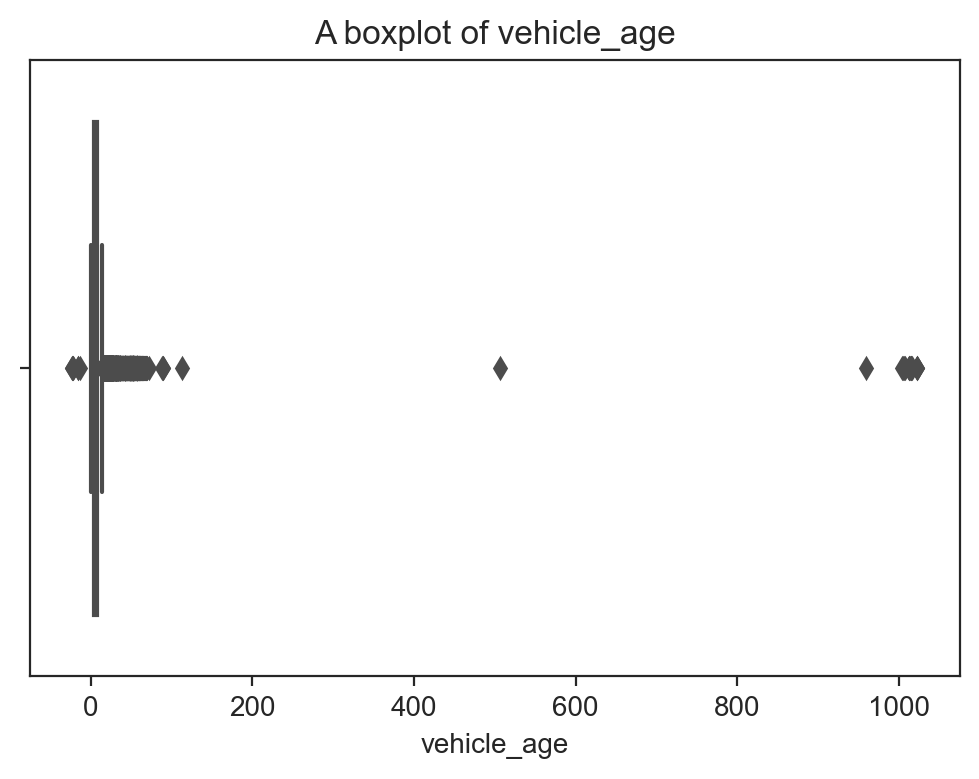

In [66]:
sns.boxplot(x=car_df['vehicle_age']);
plt.title("A boxplot of vehicle_age");

In [67]:
car_df['vehicle_age'].describe()

count    384980.000000
mean          6.473170
std           7.820909
min         -23.000000
25%           4.000000
50%           5.000000
75%           8.000000
max        1023.000000
Name: vehicle_age, dtype: float64

In [68]:
# Decision range
# Removing outliers using the vehicle_age column
# since there is no negative vals, so i will co sidere multiplying the IQR with 1.5

Q1 = car_df['vehicle_age'].quantile(0.25)
Q3 = car_df['vehicle_age'].quantile(0.75)
IQR = Q3 - Q1
car_df = car_df[(car_df['vehicle_age'] >= Q1 - 1.5 * IQR) & (car_df['vehicle_age'] <= Q3 + 1.5 * IQR)]
print("lower_val:" ,Q1 - 1.5 * IQR, "upper_val: ", Q3 + 1.5 * IQR)

lower_val: -2.0 upper_val:  14.0


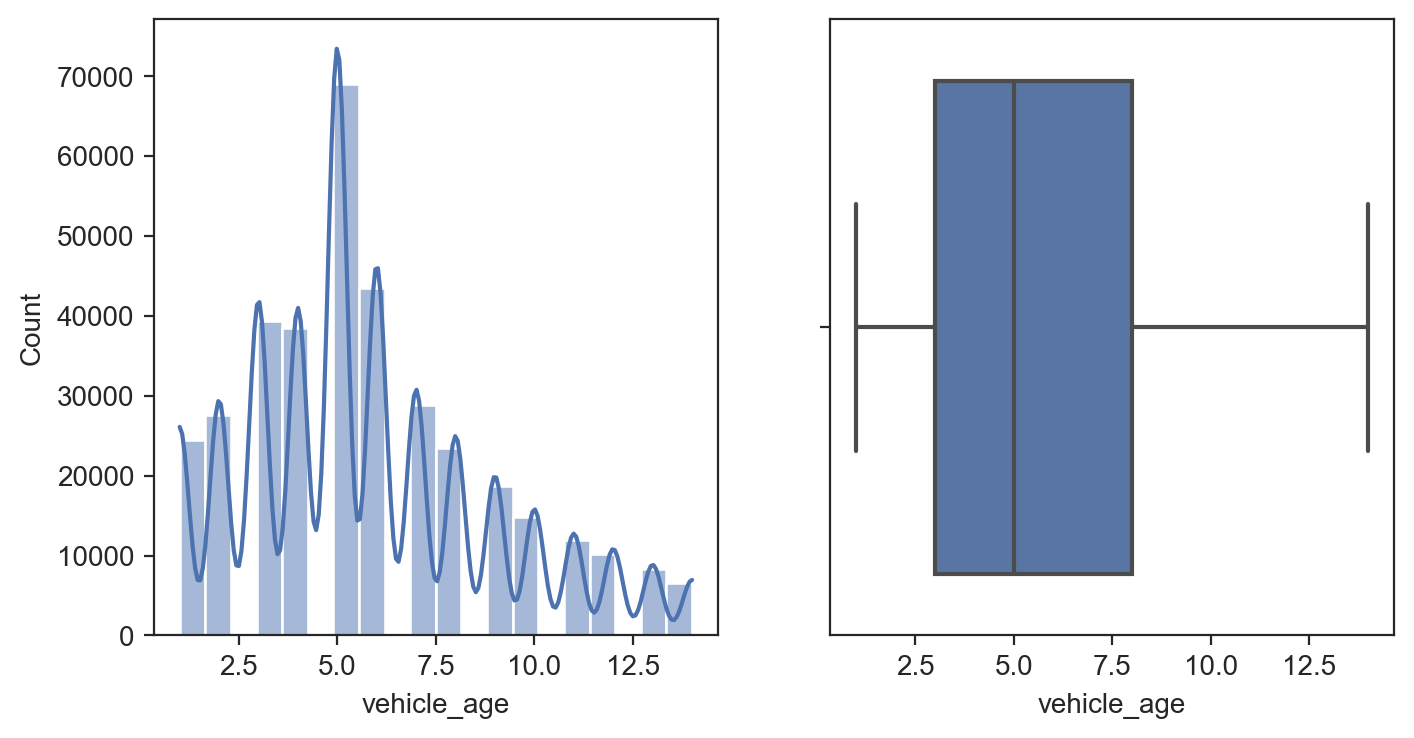

In [69]:
# the distribution after removing the ouliers
fig, ax = plt.subplots(1, 2, figsize=(8, 4));
sns.histplot(data = car_df, x='vehicle_age', bins=20,kde=True, ax=ax[0])
sns.boxplot(x=car_df['vehicle_age'], ax=ax[1]);

In [70]:
car_df['vehicle_age'].min()

1.0

In [71]:
car_df.corr()

,mileage,year_of_registration,price,vehicle_age
mileage,1.000000,-0.781387,-0.152804,0.781387
year_of_registration,-0.781387,1.000000,0.154121,-1.000000
price,-0.152804,0.154121,1.000000,-0.154121
vehicle_age,0.781387,-1.000000,-0.154121,1.000000


In [72]:
car_df['mileage_per_year'] = (car_df['mileage']/car_df['vehicle_age']).round()
car_df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,vehicle_age,mileage_per_year
0,0.0,Grey,Volvo,XC90,NEW,2021.0,73970,SUV,Petrol Plug-in Hybrid,1.0,0.0
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,Diesel,11.0,9839.0
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,Petrol,5.0,1560.0
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,Diesel,6.0,7500.0
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,Diesel,7.0,9143.0


In [73]:
# car_df['mileage_per_year'].isnull().sum()

In [74]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365198 entries, 0 to 402004
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mileage               365198 non-null  float64
 1   standard_colour       365198 non-null  object 
 2   standard_make         365198 non-null  object 
 3   standard_model        365198 non-null  object 
 4   vehicle_condition     365198 non-null  object 
 5   year_of_registration  365198 non-null  float64
 6   price                 365198 non-null  int64  
 7   body_type             365198 non-null  object 
 8   fuel_type             365198 non-null  object 
 9   vehicle_age           365198 non-null  float64
 10  mileage_per_year      365198 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 33.4+ MB


In [75]:
# sns.boxplot(data=car_df, x='fuel_type', y='price')

In [76]:
# samp_car_df = car_df.sample(frac=0.25, random_state=0)

samp_car_df = car_df.groupby(['standard_make', 'standard_model']).sample(frac=0.20, random_state=0)

# samp_car_df =car_df

In [77]:
samp_car_df['standard_make'].value_counts().head(30)

BMW               6879
Audi              6562
Vauxhall          6230
Volkswagen        6223
Mercedes-Benz     5838
Nissan            3729
Toyota            3138
Peugeot           2809
Land Rover        2705
Kia               2375
SKODA             2300
Renault           2224
Hyundai           2152
MINI              2109
Volvo             2089
Citroen           1940
SEAT              1785
Fiat              1635
Honda             1587
Jaguar            1317
Mazda             1268
Suzuki             920
Porsche            660
Mitsubishi         623
Dacia              580
Lexus              526
Jeep               309
DS AUTOMOBILES     282
Alfa Romeo         280
Smart              236
Name: standard_make, dtype: int64

In [78]:
# taking the most frequent 20 cardinality in standard model
top_20 = samp_car_df['standard_make'].value_counts().head(20).index
top_makes_20 = samp_car_df[samp_car_df['standard_make'].isin(top_20)]
top_makes_20

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,vehicle_age,mileage_per_year
157072,36250.0,Red,Audi,A1,USED,2016.0,10990,Hatchback,Petrol,6.0,6042.0
174326,32000.0,White,Audi,A1,USED,2017.0,12500,Hatchback,Diesel,5.0,6400.0
357920,36320.0,Black,Audi,A1,USED,2015.0,11299,Hatchback,Diesel,7.0,5189.0
99939,20849.0,Silver,Audi,A1,USED,2012.0,10750,Hatchback,Petrol,10.0,2085.0
88320,60000.0,Red,Audi,A1,USED,2016.0,9695,Hatchback,Petrol,6.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...
389236,0.0,Blue,Volvo,XC90,NEW,2021.0,68650,SUV,Petrol Hybrid,1.0,0.0
24488,59813.0,White,Volvo,XC90,USED,2016.0,27995,SUV,Diesel,6.0,9969.0
262922,0.0,Silver,Volvo,XC90,NEW,2021.0,66875,SUV,Diesel Hybrid,1.0,0.0
161586,95000.0,Blue,Volvo,XC90,USED,2013.0,10490,SUV,Diesel,9.0,10556.0


In [79]:
samp_car_df = top_makes_20

In [80]:
samp_car_df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,vehicle_age,mileage_per_year
157072,36250.0,Red,Audi,A1,USED,2016.0,10990,Hatchback,Petrol,6.0,6042.0
174326,32000.0,White,Audi,A1,USED,2017.0,12500,Hatchback,Diesel,5.0,6400.0
357920,36320.0,Black,Audi,A1,USED,2015.0,11299,Hatchback,Diesel,7.0,5189.0
99939,20849.0,Silver,Audi,A1,USED,2012.0,10750,Hatchback,Petrol,10.0,2085.0
88320,60000.0,Red,Audi,A1,USED,2016.0,9695,Hatchback,Petrol,6.0,10000.0


In [81]:
samp_car_df['vehicle_condition'].value_counts()

USED    61604
NEW      4022
Name: vehicle_condition, dtype: int64

In [82]:
# Coverting True to 1 and False to 0 for crossover_car_and_van
# samp_car_df['crossover_car_and_van'] = samp_car_df['crossover_car_and_van'].astype('int64')


In [83]:
# # converting USED to 0 and NEW to 1
# samp_car_df['vehicle_condition'] = samp_car_df['vehicle_condition'].map({'USED':0, 'NEW':1})


# samp_car_df.drop(columns=['year_of_registration', 'mileage'], inplace=True)

In [84]:
samp_car_df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,vehicle_age,mileage_per_year
157072,36250.0,Red,Audi,A1,USED,2016.0,10990,Hatchback,Petrol,6.0,6042.0
174326,32000.0,White,Audi,A1,USED,2017.0,12500,Hatchback,Diesel,5.0,6400.0
357920,36320.0,Black,Audi,A1,USED,2015.0,11299,Hatchback,Diesel,7.0,5189.0
99939,20849.0,Silver,Audi,A1,USED,2012.0,10750,Hatchback,Petrol,10.0,2085.0
88320,60000.0,Red,Audi,A1,USED,2016.0,9695,Hatchback,Petrol,6.0,10000.0


In [85]:
samp_car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65626 entries, 157072 to 114466
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mileage               65626 non-null  float64
 1   standard_colour       65626 non-null  object 
 2   standard_make         65626 non-null  object 
 3   standard_model        65626 non-null  object 
 4   vehicle_condition     65626 non-null  object 
 5   year_of_registration  65626 non-null  float64
 6   price                 65626 non-null  int64  
 7   body_type             65626 non-null  object 
 8   fuel_type             65626 non-null  object 
 9   vehicle_age           65626 non-null  float64
 10  mileage_per_year      65626 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 6.0+ MB


In [86]:
samp_car_df.columns

Index(['mileage', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'year_of_registration', 'price', 'body_type',
       'fuel_type', 'vehicle_age', 'mileage_per_year'],
      dtype='object')

<Axes: xlabel='mileage'>

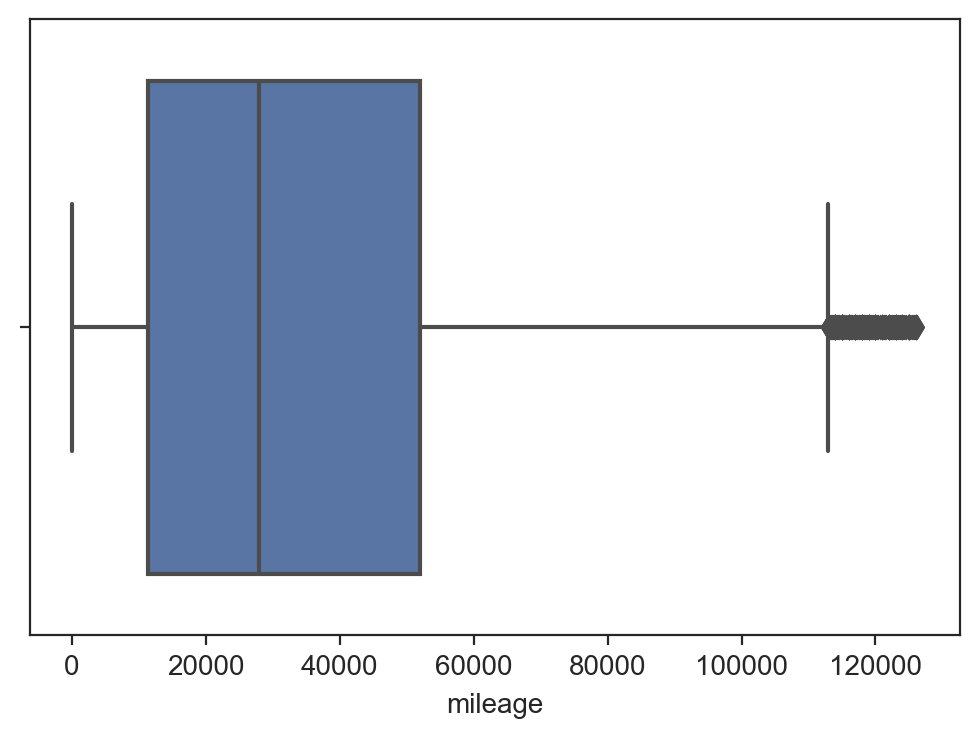

In [87]:
sns.boxplot(data = samp_car_df, x='mileage')

#You can use end of distribution to do the outliers
# sns.distplot(samp_car_df['year_of_registration'])

In [88]:
samp_car_df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,vehicle_age,mileage_per_year
157072,36250.0,Red,Audi,A1,USED,2016.0,10990,Hatchback,Petrol,6.0,6042.0
174326,32000.0,White,Audi,A1,USED,2017.0,12500,Hatchback,Diesel,5.0,6400.0
357920,36320.0,Black,Audi,A1,USED,2015.0,11299,Hatchback,Diesel,7.0,5189.0
99939,20849.0,Silver,Audi,A1,USED,2012.0,10750,Hatchback,Petrol,10.0,2085.0
88320,60000.0,Red,Audi,A1,USED,2016.0,9695,Hatchback,Petrol,6.0,10000.0


In [89]:
# for i in samp_car_df.year_of_registration:
#     samp_car_df['vehicle_reg_age'] = (2023 - samp_car_df.year_of_registration.index(i)) 

# print(list(i))

# # samp_car_df.year_of_registration[180211]



In [90]:
samp_car_df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,vehicle_age,mileage_per_year
157072,36250.0,Red,Audi,A1,USED,2016.0,10990,Hatchback,Petrol,6.0,6042.0
174326,32000.0,White,Audi,A1,USED,2017.0,12500,Hatchback,Diesel,5.0,6400.0
357920,36320.0,Black,Audi,A1,USED,2015.0,11299,Hatchback,Diesel,7.0,5189.0
99939,20849.0,Silver,Audi,A1,USED,2012.0,10750,Hatchback,Petrol,10.0,2085.0
88320,60000.0,Red,Audi,A1,USED,2016.0,9695,Hatchback,Petrol,6.0,10000.0


In [91]:
cat_var = ['standard_make', 'standard_model', 'standard_colour', 'vehicle_condition', 'body_type', 'fuel_type' ]

In [92]:
samp_car_cat = samp_car_df[cat_var]

In [93]:
for feat in samp_car_cat[:]:
    print(feat, ':', len(samp_car_cat[feat].unique()), 'labels')
    
#use onehotcoding for the binary labels which is vehicle condition 
#and target for those more than 2 labels

#The target should be don separately on the test and train data, to avoid data leakages
#Even standardization also should be done separately
#Data leakage: if done on the whole data, the data of the test is a also considered in its calculations
#For encoding methods that don't involve information from the entire dataset (e.g., one-hot encoding, binary encoding), you can typically encode before splitting.
#For methods that could potentially involve information from the entire dataset (e.g., target encoding), it's safer to encode after splitting to avoid data leakage

standard_make : 20 labels
standard_model : 452 labels
standard_colour : 21 labels
vehicle_condition : 2 labels
body_type : 14 labels
fuel_type : 7 labels


In [94]:
samp_car_df.corr()

,mileage,year_of_registration,price,vehicle_age,mileage_per_year
mileage,1.000000,-0.784938,-0.460998,0.784938,0.830987
year_of_registration,-0.784938,1.000000,0.543799,-1.000000,-0.434650
price,-0.460998,0.543799,1.000000,-0.543799,-0.360047
vehicle_age,0.784938,-1.000000,-0.543799,1.000000,0.434650
mileage_per_year,0.830987,-0.434650,-0.360047,0.434650,1.000000


### Feature Selection and train/test split

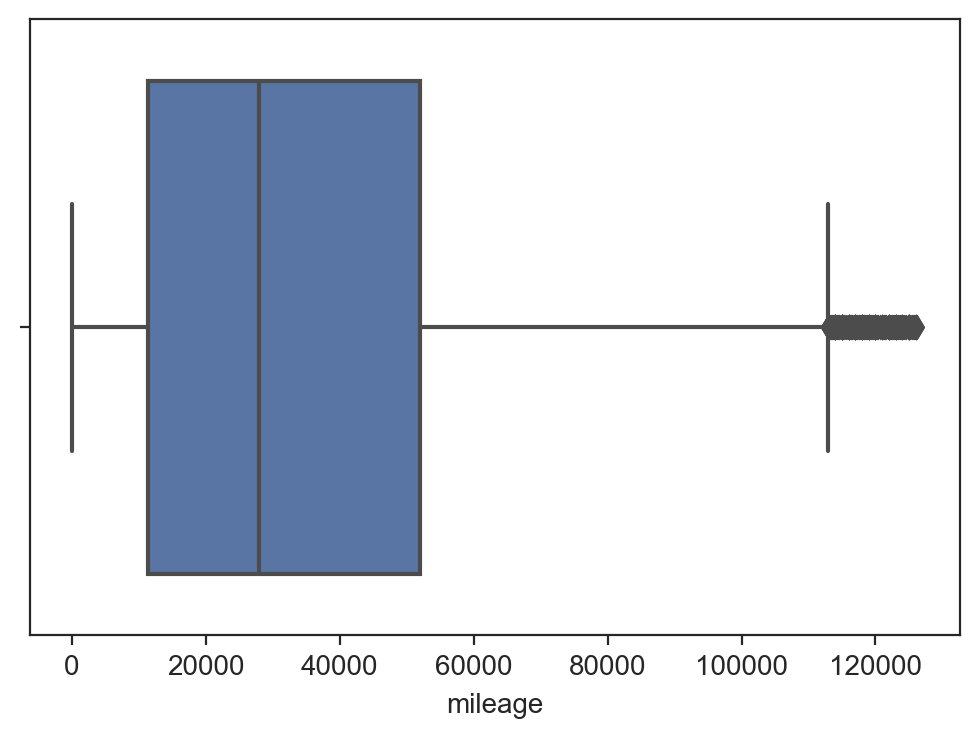

In [95]:
sns.boxplot(x=samp_car_df['mileage']);

In [96]:
# samp_car_df.drop(columns=[], inplace=True)

In [97]:
tgt = ['price']
cat_ft_oh =[ 'vehicle_condition']
cat_ft_te = [ 'standard_make', 'standard_model', 
             'body_type', 'fuel_type', "standard_colour"]
num_ft =[ 'mileage', 'year_of_registration','mileage_per_year', 'vehicle_age']

In [98]:
X = samp_car_df.drop(columns='price')
y = samp_car_df['price']

In [99]:
X.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,fuel_type,vehicle_age,mileage_per_year
157072,36250.0,Red,Audi,A1,USED,2016.0,Hatchback,Petrol,6.0,6042.0
174326,32000.0,White,Audi,A1,USED,2017.0,Hatchback,Diesel,5.0,6400.0
357920,36320.0,Black,Audi,A1,USED,2015.0,Hatchback,Diesel,7.0,5189.0
99939,20849.0,Silver,Audi,A1,USED,2012.0,Hatchback,Petrol,10.0,2085.0
88320,60000.0,Red,Audi,A1,USED,2016.0,Hatchback,Petrol,6.0,10000.0


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Data Preparation and Transformation with pipelines

In [101]:
num_trans = Pipeline(
        steps = [
            ("scaler", MinMaxScaler())
        ]
)

In [102]:
num_trans

Pipeline(steps=[('scaler', MinMaxScaler())])

In [103]:
cat_trans_oh = Pipeline(
        steps=[
            ("encoder", OneHotEncoder(
                sparse_output=False, 
                drop="if_binary"
            ))
        ]
)

In [104]:
cat_trans_oh

Pipeline(steps=[('encoder',
                 OneHotEncoder(drop='if_binary', sparse_output=False))])

In [105]:
cat_trans_te = Pipeline(
        steps=[
            ("encoder", TargetEncoder(target_type='continuous', 
                                      shuffle=False)),
            ("scaler", MinMaxScaler())
        ]

)

#if the shuffle is false, it prevents the value variation, at the same time
#i can do some cross validation there, but i will carry it out later

In [106]:
cat_trans_te

Pipeline(steps=[('encoder',
                 TargetEncoder(shuffle=False, target_type='continuous')),
                ('scaler', MinMaxScaler())])

In [107]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_trans, num_ft),
        ("cat_oh", cat_trans_oh, cat_ft_oh),
        ("cat_te", cat_trans_te, cat_ft_te)
    ]
)

In [108]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['mileage', 'year_of_registration',
                                  'mileage_per_year', 'vehicle_age']),
                                ('cat_oh',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 ['vehicle_condition']),
                                ('cat_te',
                                 Pipeline(steps=[('encoder',
                                                  TargetEncoder(shuffle=False,
                                                                target_type='continuous')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['standard_make', 'standard_model',
                                  'body_type', 'fuel_type',
                                  'standard_colour'])])

In [109]:
X_train_pro = preprocessor.fit_transform(X_train, y_train)
# X_train

X_test_pro = preprocessor.fit_transform(X_test, y_test)

In [110]:
X_test_pro

,num__mileage,num__year_of_registration,num__mileage_per_year,num__vehicle_age,cat_oh__vehicle_condition_USED,cat_te__standard_make,cat_te__standard_model,cat_te__body_type,cat_te__fuel_type,cat_te__standard_colour
136957,0.257549,0.769231,0.258095,0.230769,1.0,0.123629,0.036486,0.202398,0.093252,0.540630
200038,0.451424,0.153846,0.150794,0.846154,1.0,0.023820,0.010663,0.029970,0.004398,0.540630
65454,0.573958,0.692308,0.460127,0.307692,1.0,0.470968,0.060461,0.164056,0.093252,0.766897
240071,0.006851,0.923077,0.013714,0.076923,1.0,0.170676,0.017477,0.015134,0.004398,0.540630
114155,0.122162,0.846154,0.163238,0.153846,1.0,0.023820,0.017518,0.015134,0.004398,0.540630
...,...,...,...,...,...,...,...,...,...,...
339598,0.237592,0.769231,0.238095,0.230769,1.0,0.024764,0.026624,0.028808,0.003581,0.784378
229661,0.492599,0.384615,0.219397,0.615385,1.0,0.212578,0.032752,0.202886,0.003581,0.796442
363722,0.237671,0.769231,0.238159,0.230769,1.0,0.430598,0.049143,0.111010,0.089199,0.841910
96572,0.102956,0.692308,0.082540,0.307692,1.0,0.122879,0.016880,0.014447,0.003581,0.707854


In [111]:
y_train

352589    36866
81739      7993
311900     4999
225666    11850
262793    15460
          ...  
313314     9495
122036    61905
264860    11500
274550     7695
157427    22980
Name: price, Length: 49219, dtype: int64

## MODEL BUILDING

#### KNN

In [112]:
knnr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("KNN_regressor", KNeighborsRegressor(n_neighbors=3))
    ]
)

In [113]:
knnr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'mileage_per_year',
                                                   'vehicle_age']),
                                                 ('cat_oh',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['vehicle_condition']),
                                                 ('cat_te',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder(shuffle=False,
                                                                                 target_type='continuous')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'body_type', 'fuel_type',
                                                   'standard_colour'])])),
                ('KNN_regressor', KNeighborsRegressor(n_neighbors=3))])

In [114]:
#This explains how the model is doing well on the train and test data
knnr.score(X_test, y_test), knnr.score(X_train, y_train)

(0.8480379621220838, 0.9279651917008978)

In [115]:
cross_val_score(knnr, X_train, y_train)

array([0.86644588, 0.82638144, 0.84352931, 0.86837243, 0.84701432])

In [116]:
print("MAE on test:", mean_absolute_error(y_test, knnr.predict(X_test)) )

print("MAE on train:", mean_absolute_error(y_train, knnr.predict(X_train)) )

MAE on test: 2500.1321996708716
MAE on train: 1750.469947242596


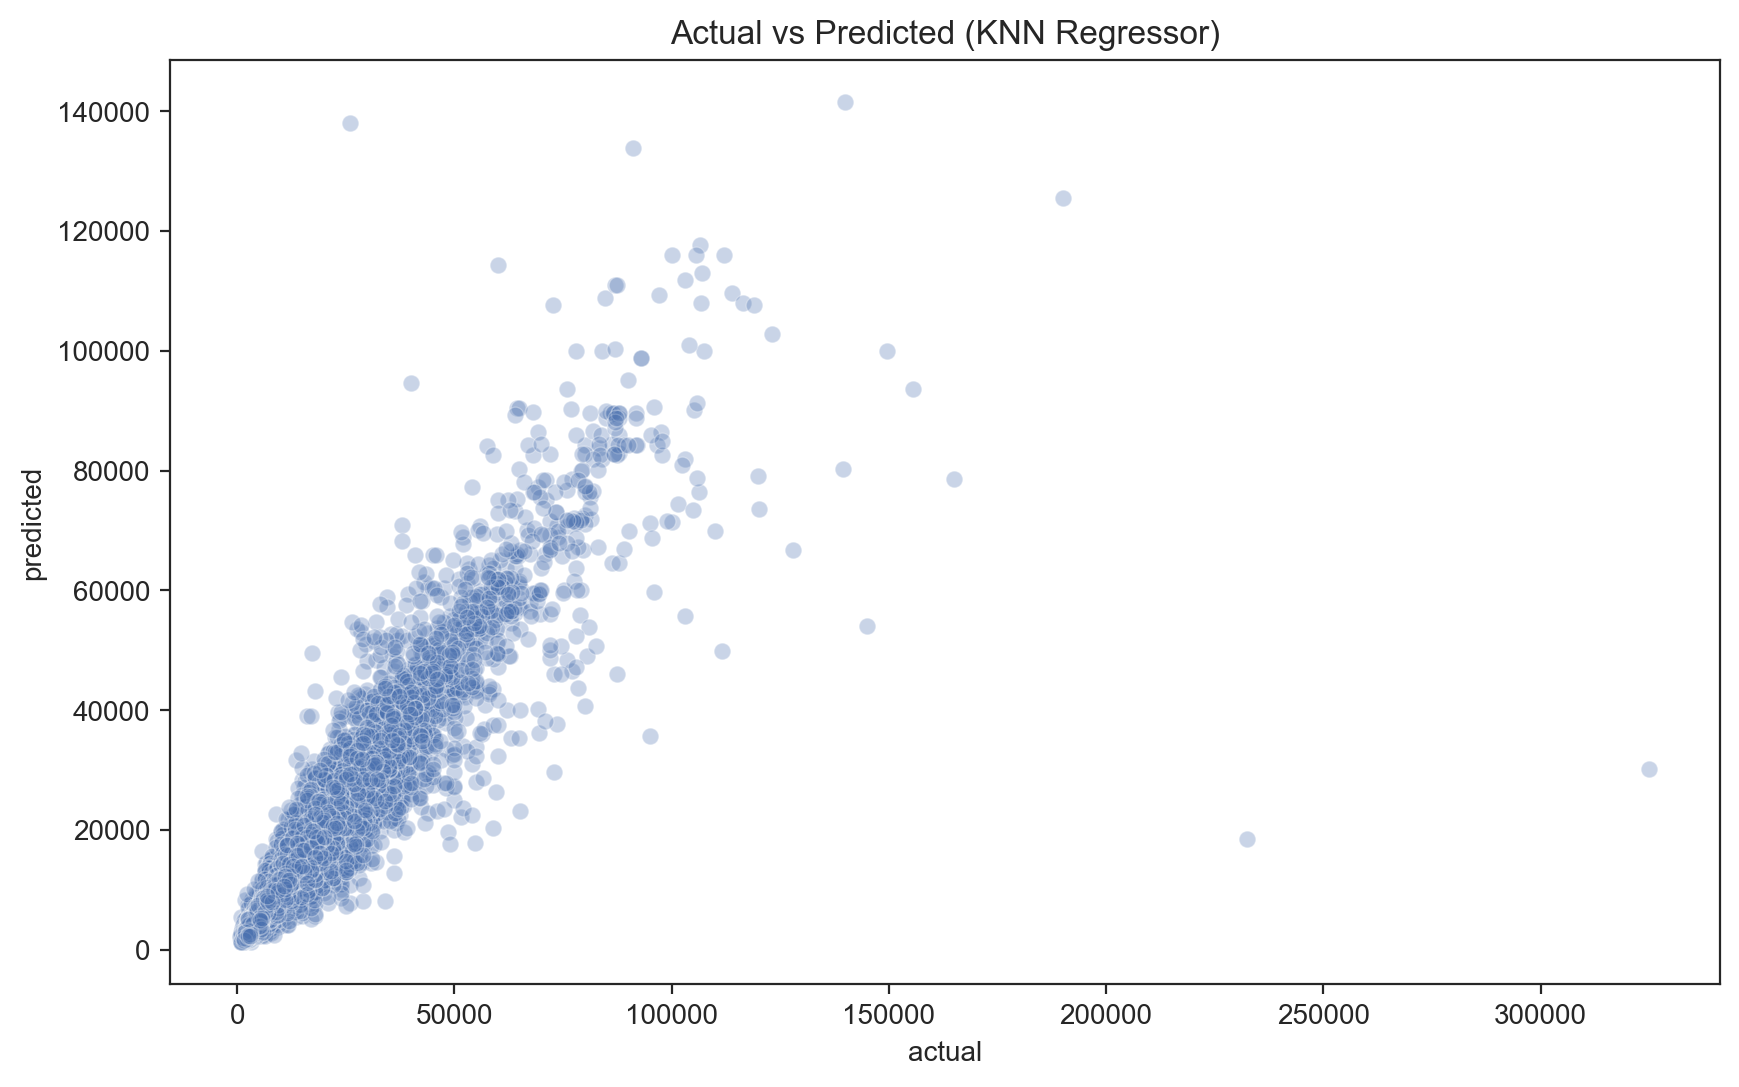

In [117]:
result = pd.DataFrame({'actual': y_test, 'predicted': knnr.predict(X_test)})

plt.figure(figsize=(10,6));
sns.scatterplot(data = result, x='actual', y='predicted', alpha=0.3);
plt.title('Actual vs Predicted (KNN Regressor)');
plt.show();

In [118]:
# X_train.drop(columns=['mileage_per_year','vehicle_age'], inplace=True )
# X_test.drop(columns=['mileage_per_year','vehicle_age'], inplace=True )

In [119]:
X_train

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,fuel_type,vehicle_age,mileage_per_year
352589,0.0,Black,Audi,A4,NEW,2021.0,Saloon,Petrol,1.0,0.0
81739,105000.0,Grey,Volvo,XC60,USED,2011.0,SUV,Diesel,11.0,9545.0
311900,55000.0,Blue,Mercedes-Benz,B Class,USED,2008.0,Hatchback,Petrol,14.0,3929.0
225666,15499.0,Grey,Nissan,Juke,USED,2018.0,SUV,Petrol,4.0,3875.0
262793,25427.0,Blue,Honda,HR-V,USED,2017.0,SUV,Diesel,5.0,5085.0
...,...,...,...,...,...,...,...,...,...,...
313314,26750.0,Black,Renault,Captur,USED,2016.0,SUV,Petrol,6.0,4458.0
122036,0.0,Grey,Jaguar,F-Type,NEW,2021.0,Coupe,Petrol,1.0,0.0
264860,4422.0,Silver,SKODA,Fabia,USED,2020.0,Hatchback,Petrol,2.0,2211.0
274550,10898.0,Black,Renault,Clio,USED,2016.0,Hatchback,Petrol,6.0,1816.0


#### hyperparamenter tunning for KNN

In [120]:
param_grid = {
    'KNN_regressor__n_neighbors': [3, 5, 7, 9],
    'KNN_regressor__weights': ['uniform', 'distance'],
    'KNN_regressor__p': [1, 2]
    #p is minkowski metric, 1 is manhattan_distance, 2 is euclidean_distance
}

In [121]:
list (ParameterGrid(param_grid))

[{'KNN_regressor__n_neighbors': 3,
  'KNN_regressor__p': 1,
  'KNN_regressor__weights': 'uniform'},
 {'KNN_regressor__n_neighbors': 3,
  'KNN_regressor__p': 1,
  'KNN_regressor__weights': 'distance'},
 {'KNN_regressor__n_neighbors': 3,
  'KNN_regressor__p': 2,
  'KNN_regressor__weights': 'uniform'},
 {'KNN_regressor__n_neighbors': 3,
  'KNN_regressor__p': 2,
  'KNN_regressor__weights': 'distance'},
 {'KNN_regressor__n_neighbors': 5,
  'KNN_regressor__p': 1,
  'KNN_regressor__weights': 'uniform'},
 {'KNN_regressor__n_neighbors': 5,
  'KNN_regressor__p': 1,
  'KNN_regressor__weights': 'distance'},
 {'KNN_regressor__n_neighbors': 5,
  'KNN_regressor__p': 2,
  'KNN_regressor__weights': 'uniform'},
 {'KNN_regressor__n_neighbors': 5,
  'KNN_regressor__p': 2,
  'KNN_regressor__weights': 'distance'},
 {'KNN_regressor__n_neighbors': 7,
  'KNN_regressor__p': 1,
  'KNN_regressor__weights': 'uniform'},
 {'KNN_regressor__n_neighbors': 7,
  'KNN_regressor__p': 1,
  'KNN_regressor__weights': 'distanc

In [122]:
knn_gr = GridSearchCV(knnr, param_grid, return_train_score=True)

In [123]:
knn_res = knn_gr.fit(X_train, y_train)

In [124]:
knn_res_df = pd.DataFrame(knn_res.cv_results_)

In [125]:
knn_res_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN_regressor__n_neighbors,param_KNN_regressor__p,param_KNN_regressor__weights,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.268733,0.036175,0.809322,0.142303,3,1,uniform,"{'KNN_regressor__n_neighbors': 3, 'KNN_regress...",0.870619,0.830300,...,0.857428,0.015736,14,0.926463,0.927952,0.925980,0.929642,0.937803,0.929568,0.004312
1,0.271853,0.023381,1.003057,0.176320,3,1,distance,"{'KNN_regressor__n_neighbors': 3, 'KNN_regress...",0.876249,0.830012,...,0.859740,0.017034,13,0.968976,0.970104,0.973538,0.972904,0.976937,0.972492,0.002796
2,0.262481,0.020725,0.818695,0.132058,3,2,uniform,"{'KNN_regressor__n_neighbors': 3, 'KNN_regress...",0.866446,0.826381,...,0.850349,0.015595,16,0.924702,0.922802,0.922594,0.927047,0.933728,0.926175,0.004103
3,0.262488,0.024995,0.846815,0.105692,3,2,distance,"{'KNN_regressor__n_neighbors': 3, 'KNN_regress...",0.870942,0.827539,...,0.853252,0.015383,15,0.965867,0.962803,0.969295,0.968681,0.972677,0.967865,0.003331
4,0.268730,0.018221,0.996807,0.182043,5,1,uniform,"{'KNN_regressor__n_neighbors': 5, 'KNN_regress...",0.875779,0.835971,...,0.863300,0.015615,7,0.909468,0.910755,0.903045,0.912096,0.920204,0.911114,0.005505


In [126]:
knn_res_df[ [
    'param_KNN_regressor__n_neighbors', 'param_KNN_regressor__p',
    'param_KNN_regressor__weights', 'params',
    'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
] ].sort_values('rank_test_score')

,param_KNN_regressor__n_neighbors,param_KNN_regressor__p,param_KNN_regressor__weights,params,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
15,9,2,distance,"{'KNN_regressor__n_neighbors': 9, 'KNN_regress...",0.950614,0.003181,0.870259,0.013498,1
9,7,1,distance,"{'KNN_regressor__n_neighbors': 7, 'KNN_regress...",0.958296,0.002974,0.869850,0.013460,2
13,9,1,distance,"{'KNN_regressor__n_neighbors': 9, 'KNN_regress...",0.953128,0.003042,0.869425,0.013208,3
11,7,2,distance,"{'KNN_regressor__n_neighbors': 7, 'KNN_regress...",0.955391,0.003159,0.868732,0.013981,4
5,5,1,distance,"{'KNN_regressor__n_neighbors': 5, 'KNN_regress...",0.964421,0.002736,0.868065,0.015996,5
7,5,2,distance,"{'KNN_regressor__n_neighbors': 5, 'KNN_regress...",0.960918,0.003001,0.865584,0.014932,6
4,5,1,uniform,"{'KNN_regressor__n_neighbors': 5, 'KNN_regress...",0.911114,0.005505,0.863300,0.015615,7
8,7,1,uniform,"{'KNN_regressor__n_neighbors': 7, 'KNN_regress...",0.900009,0.006029,0.862662,0.012671,8
14,9,2,uniform,"{'KNN_regressor__n_neighbors': 9, 'KNN_regress...",0.892880,0.005876,0.862051,0.013262,9
10,7,2,uniform,"{'KNN_regressor__n_neighbors': 7, 'KNN_regress...",0.899803,0.005826,0.861772,0.013529,10


In [127]:
knn_res.best_params_

#weight is distance, therefore closer neighbours have a greater influence
#p is 2 - euclidean distance -> meaning the distance is calculated using the hypothenus

{'KNN_regressor__n_neighbors': 9,
 'KNN_regressor__p': 2,
 'KNN_regressor__weights': 'distance'}

#### Inserting the best param into the algorithm

In [128]:
bst_knnr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("KNN_regressor", KNeighborsRegressor(n_neighbors=9, 
                                              p=2,
                                              weights='distance')
        )
    ]
)

In [129]:
bst_knnr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'mileage_per_year',
                                                   'vehicle_age']),
                                                 ('cat_oh',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['vehicle_condition']),
                                                 ('cat_te',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder(shuffle=False,
                                                                                 target_type='continuous')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'body_type', 'fuel_type',
                                                   'standard_colour'])])),
                ('KNN_regressor',
                 KNeighborsRegressor(n_neighbors=9, weights='distance'))])

In [130]:
bst_knnr.score(X_test, y_test), bst_knnr.score(X_train, y_train)

(0.8596779463302247, 0.9559024349971458)

In [131]:
mean_absolute_error(y_test, bst_knnr.predict(X_test))

print("MAE on test:", mean_absolute_error(y_test, bst_knnr.predict(X_test)) )

print("MAE on train:", mean_absolute_error(y_train, bst_knnr.predict(X_train)) )


MAE on test: 2372.803871089463
MAE on train: 1234.6198389270846


### Decision Tree

In [132]:
# X_train_pro is the processed dataframe

X_test_pro.head()



,num__mileage,num__year_of_registration,num__mileage_per_year,num__vehicle_age,cat_oh__vehicle_condition_USED,cat_te__standard_make,cat_te__standard_model,cat_te__body_type,cat_te__fuel_type,cat_te__standard_colour
136957,0.257549,0.769231,0.258095,0.230769,1.0,0.123629,0.036486,0.202398,0.093252,0.540630
200038,0.451424,0.153846,0.150794,0.846154,1.0,0.023820,0.010663,0.029970,0.004398,0.540630
65454,0.573958,0.692308,0.460127,0.307692,1.0,0.470968,0.060461,0.164056,0.093252,0.766897
240071,0.006851,0.923077,0.013714,0.076923,1.0,0.170676,0.017477,0.015134,0.004398,0.540630
114155,0.122162,0.846154,0.163238,0.153846,1.0,0.023820,0.017518,0.015134,0.004398,0.540630


In [133]:
#Arranging the processed X_train_pro in the same order as previous X_train
# X_train_pro.set_axis(['mileage','crossover_car_and_van','vehicle_age','vehicle_condition', 'standard_colour', 'standard_make', 'standard_model',
#         'body_type',  'fuel_type',
#        ], axis=1, inplace=True)

# X_train_pro = X_train_pro[['mileage', 'standard_colour', 'standard_make', 'standard_model',
#        'vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type',
#        'vehicle_age']]

In [134]:
dtr = DecisionTreeRegressor(max_depth=3)

In [135]:
dtr.fit(X_train_pro, y_train)



DecisionTreeRegressor(max_depth=3)

In [136]:
X_train.columns

Index(['mileage', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'year_of_registration', 'body_type', 'fuel_type',
       'vehicle_age', 'mileage_per_year'],
      dtype='object')

In [137]:

print(export_text(dtr, feature_names=X_train_pro.columns.to_list()))

|--- cat_te__standard_model <= 0.20
|   |--- num__vehicle_age <= 0.17
|   |   |--- cat_te__standard_model <= 0.10
|   |   |   |--- value: [15862.19]
|   |   |--- cat_te__standard_model >  0.10
|   |   |   |--- value: [26958.61]
|   |--- num__vehicle_age >  0.17
|   |   |--- cat_te__standard_model <= 0.11
|   |   |   |--- value: [8238.02]
|   |   |--- cat_te__standard_model >  0.11
|   |   |   |--- value: [15082.10]
|--- cat_te__standard_model >  0.20
|   |--- num__mileage <= 0.12
|   |   |--- cat_te__standard_model <= 0.33
|   |   |   |--- value: [42828.78]
|   |   |--- cat_te__standard_model >  0.33
|   |   |   |--- value: [72308.13]
|   |--- num__mileage >  0.12
|   |   |--- num__mileage <= 0.43
|   |   |   |--- value: [32650.34]
|   |   |--- num__mileage >  0.43
|   |   |   |--- value: [19497.30]



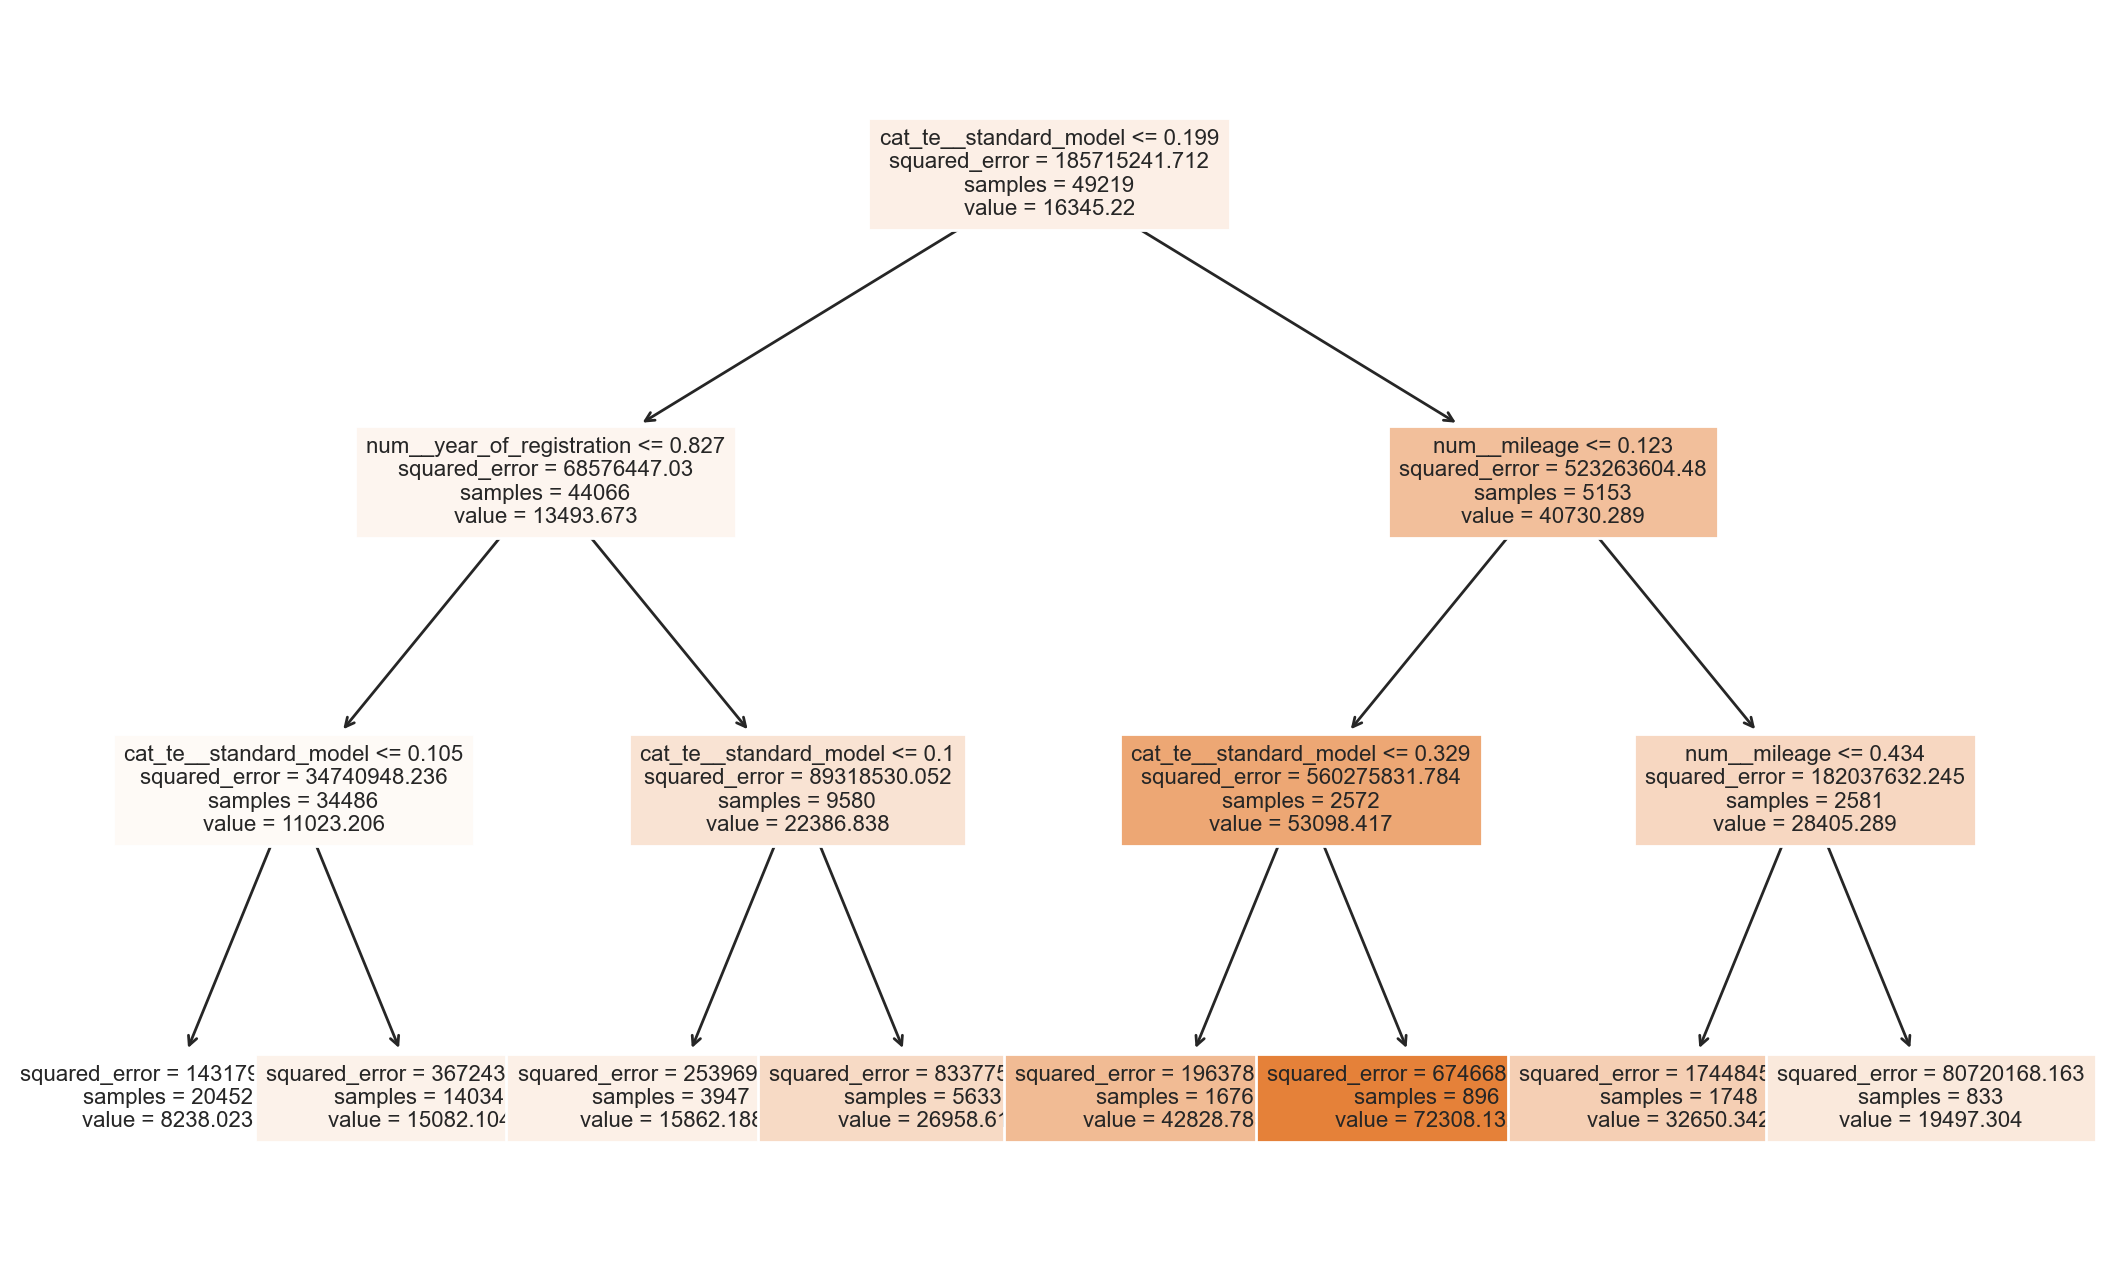

In [138]:
plt.figure(figsize=(13, 8))

tree.plot_tree(dtr.fit(X_train_pro, y_train), filled=True, feature_names=X_train_pro.columns.tolist(), fontsize=8);

plt.show()

In [139]:
mean_absolute_error(y_test, dtr.predict(X_test_pro))

# There are leakages happenening here

7497.16562262316

In [140]:
dtr.score(X_test_pro, y_test), dtr.score(X_train_pro, y_train)

#The perfomance is bad on the unseen data

(0.17861515355381052, 0.7063687788252994)

##### Hyperparameter tuning

The model isn't perfoming well on the teest data, this might seems like an 
overfitting cos it performs on the train data, let's try tunning 


In [141]:
param_grid = {
    'max_depth': [ 1, 3, 5, 8, 11 ],
    'min_samples_leaf': [ 10, 20, 30 ]
}

In [142]:
list(ParameterGrid(param_grid))

[{'max_depth': 1, 'min_samples_leaf': 10},
 {'max_depth': 1, 'min_samples_leaf': 20},
 {'max_depth': 1, 'min_samples_leaf': 30},
 {'max_depth': 3, 'min_samples_leaf': 10},
 {'max_depth': 3, 'min_samples_leaf': 20},
 {'max_depth': 3, 'min_samples_leaf': 30},
 {'max_depth': 5, 'min_samples_leaf': 10},
 {'max_depth': 5, 'min_samples_leaf': 20},
 {'max_depth': 5, 'min_samples_leaf': 30},
 {'max_depth': 8, 'min_samples_leaf': 10},
 {'max_depth': 8, 'min_samples_leaf': 20},
 {'max_depth': 8, 'min_samples_leaf': 30},
 {'max_depth': 11, 'min_samples_leaf': 10},
 {'max_depth': 11, 'min_samples_leaf': 20},
 {'max_depth': 11, 'min_samples_leaf': 30}]

In [143]:
gs_rgr = GridSearchCV(dtr, param_grid, return_train_score=True)

In [144]:
gs_res = gs_rgr.fit(X_train_pro, y_train)

In [145]:
gs_df = pd.DataFrame(gs_res.cv_results_)

In [146]:
gs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043748,0.006252,0.000000,0.000000,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.373529,0.379338,0.371393,...,0.373136,0.005890,13,0.374635,0.372625,0.375138,0.377110,0.372836,0.374469,0.001644
1,0.037496,0.007653,0.003125,0.006250,1,20,"{'max_depth': 1, 'min_samples_leaf': 20}",0.373529,0.379338,0.371393,...,0.373136,0.005890,13,0.374635,0.372625,0.375138,0.377110,0.372836,0.374469,0.001644
2,0.040620,0.007655,0.003125,0.006250,1,30,"{'max_depth': 1, 'min_samples_leaf': 30}",0.373529,0.379338,0.371393,...,0.373136,0.005890,13,0.374635,0.372625,0.375138,0.377110,0.372836,0.374469,0.001644
3,0.112491,0.006251,0.003125,0.006249,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.693866,0.701094,0.700063,...,0.698049,0.002552,10,0.707659,0.706475,0.707591,0.704842,0.708380,0.706990,0.001235
4,0.128117,0.011693,0.000000,0.000000,3,20,"{'max_depth': 3, 'min_samples_leaf': 20}",0.693866,0.701045,0.700063,...,0.698040,0.002541,12,0.707659,0.706475,0.707591,0.704842,0.708380,0.706990,0.001235


In [147]:
gs_df[ [
    'param_max_depth', 'param_min_samples_leaf',
    'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
] ].sort_values('rank_test_score')

,param_max_depth,param_min_samples_leaf,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
13,11,20,0.899007,0.001637,0.860720,0.010143,1
14,11,30,0.889471,0.001166,0.860494,0.005767,2
12,11,10,0.911239,0.001449,0.856680,0.011549,3
11,8,30,0.877089,0.001623,0.853397,0.003828,4
10,8,20,0.882955,0.001518,0.851336,0.009105,5
9,8,10,0.888405,0.001925,0.849323,0.008629,6
6,5,10,0.822828,0.000774,0.809706,0.008194,7
7,5,20,0.822828,0.000774,0.809706,0.008194,7
8,5,30,0.822828,0.000774,0.809690,0.008164,9
3,3,10,0.706990,0.001235,0.698049,0.002552,10


In [148]:
print('mean_test_score :' ,gs_df.iloc[14].mean_test_score)     
print('mean_train_score :' ,gs_df.iloc[14].mean_train_score) 

mean_test_score : 0.8604935007934185
mean_train_score : 0.8894707091156067


In [149]:
best_param = gs_res.best_params_
best_param

{'max_depth': 11, 'min_samples_leaf': 20}

In [150]:
bst_dtr = DecisionTreeRegressor(max_depth=11, min_samples_leaf=30)  

In [151]:
bst_dtr.fit(X_train_pro, y_train)

DecisionTreeRegressor(max_depth=11, min_samples_leaf=30)

In [152]:
#The MAE reduced when the parameter were tuned accordingly, but at the same time
#the MAE is too high.
print("MAE on test:", mean_absolute_error(y_test, bst_dtr.predict(X_test_pro)) )

print("MAE on train:", mean_absolute_error(y_train, bst_dtr.predict(X_train_pro)) )

MAE on test: 7508.834026188134
MAE on train: 2263.8964706800375


In [153]:
# plt.figure(figsize=(13, 8))

# tree.plot_tree(bst_dtr.fit(X_train_pro, y_train), filled=True, feature_names=X_train_pro.columns.tolist(), fontsize=8);

# plt.show()
print(export_text(bst_dtr, feature_names=X_train_pro.columns.to_list()))

|--- cat_te__standard_model <= 0.20
|   |--- num__vehicle_age <= 0.17
|   |   |--- cat_te__standard_model <= 0.10
|   |   |   |--- cat_te__standard_model <= 0.07
|   |   |   |   |--- num__vehicle_age <= 0.12
|   |   |   |   |   |--- cat_te__fuel_type <= 0.05
|   |   |   |   |   |   |--- cat_te__standard_model <= 0.05
|   |   |   |   |   |   |   |--- cat_te__standard_model <= 0.05
|   |   |   |   |   |   |   |   |--- num__year_of_registration <= 0.96
|   |   |   |   |   |   |   |   |   |--- value: [10509.76]
|   |   |   |   |   |   |   |   |--- num__year_of_registration >  0.96
|   |   |   |   |   |   |   |   |   |--- value: [11489.31]
|   |   |   |   |   |   |   |--- cat_te__standard_model >  0.05
|   |   |   |   |   |   |   |   |--- cat_te__standard_model <= 0.05
|   |   |   |   |   |   |   |   |   |--- value: [17191.17]
|   |   |   |   |   |   |   |   |--- cat_te__standard_model >  0.05
|   |   |   |   |   |   |   |   |   |--- num__year_of_registration <= 0.96
|   |   |   |   |   |  

## USING PIPELINE WITH THE DTR MODEL

In [154]:
dtr_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("DTR_regressor", DecisionTreeRegressor(max_depth=9) )
    ]
)

In [155]:
dtr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'mileage_per_year',
                                                   'vehicle_age']),
                                                 ('cat_oh',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['vehicle_condition']),
                                                 ('cat_te',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder(shuffle=False,
                                                                                 target_type='continuous')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'body_type', 'fuel_type',
                                                   'standard_colour'])])),
                ('DTR_regressor', DecisionTreeRegressor(max_depth=9))])

In [156]:
dtr_pipe.score(X_test, y_test), dtr_pipe.score(X_train, y_train)

(0.7954111312876264, 0.9024490234159084)

In [157]:
print("MAE on test:", mean_absolute_error(y_test, dtr_pipe.predict(X_test)) )

print("MAE on train:", mean_absolute_error(y_train, dtr_pipe.predict(X_train)) )

MAE on test: 2544.4581508459387
MAE on train: 2328.8771628776735


In [158]:
#Although the perfomance is high but the MAE is also high at some point

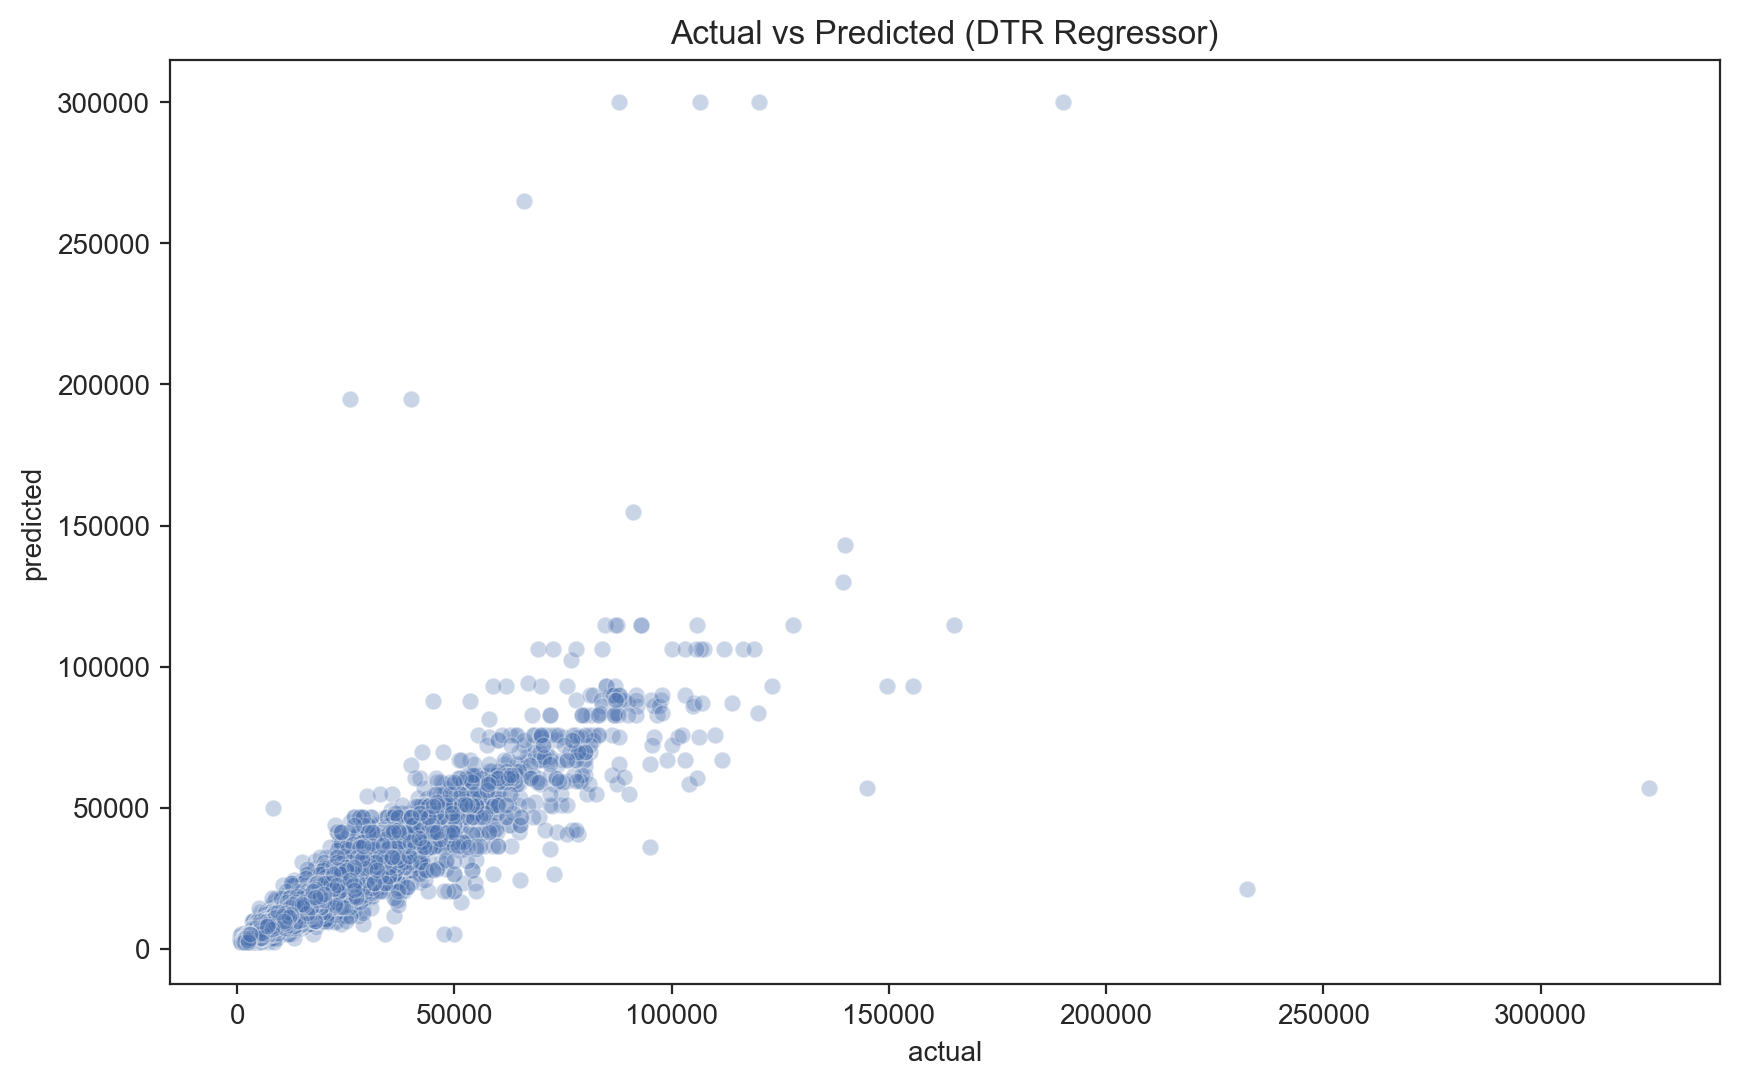

In [159]:
result = pd.DataFrame({'actual': y_test, 'predicted': dtr_pipe.predict(X_test)})
plt.figure(figsize=(10,6));
sns.scatterplot(data = result, x='actual', y='predicted', alpha=0.3);
plt.title('Actual vs Predicted (DTR Regressor)');
plt.show();

In [160]:
X_train.columns

Index(['mileage', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'year_of_registration', 'body_type', 'fuel_type',
       'vehicle_age', 'mileage_per_year'],
      dtype='object')

In [161]:

Dtree_reg = dtr_pipe.named_steps['DTR_regressor']
print(export_text(Dtree_reg, feature_names=X_train.columns.to_list()))
# Dtree_reg

|--- body_type <= 0.20
|   |--- standard_colour <= 0.83
|   |   |--- body_type <= 0.11
|   |   |   |--- standard_model <= 0.48
|   |   |   |   |--- body_type <= 0.07
|   |   |   |   |   |--- standard_model <= 0.33
|   |   |   |   |   |   |--- body_type <= 0.05
|   |   |   |   |   |   |   |--- body_type <= 0.05
|   |   |   |   |   |   |   |   |--- fuel_type <= 0.11
|   |   |   |   |   |   |   |   |   |--- value: [7197.94]
|   |   |   |   |   |   |   |   |--- fuel_type >  0.11
|   |   |   |   |   |   |   |   |   |--- value: [8573.79]
|   |   |   |   |   |   |   |--- body_type >  0.05
|   |   |   |   |   |   |   |   |--- fuel_type <= 0.12
|   |   |   |   |   |   |   |   |   |--- value: [8092.61]
|   |   |   |   |   |   |   |   |--- fuel_type >  0.12
|   |   |   |   |   |   |   |   |   |--- value: [10951.43]
|   |   |   |   |   |   |--- body_type >  0.05
|   |   |   |   |   |   |   |--- standard_model <= 0.27
|   |   |   |   |   |   |   |   |--- fuel_type <= 0.21
|   |   |   |   |   |   | 

In [162]:
# plt.figure(figsize=(13, 8))

# tree.plot_tree(dtr_pipe.fit(X_train, y_train), filled=True, feature_names=X_train.columns.tolist(), fontsize=8);

# plt.show()


#### Hyperparameter tuning

In [163]:
dtr_pipe_2 = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("DTR_regressor", DecisionTreeRegressor(max_depth=1))
    ]
)

In [164]:
param_grid = {
    'DTR_regressor__max_depth': [1, 3, 7, 9, 11],
    'DTR_regressor__min_samples_leaf': [10, 20, 30]
}

In [165]:
list(ParameterGrid(param_grid))

[{'DTR_regressor__max_depth': 1, 'DTR_regressor__min_samples_leaf': 10},
 {'DTR_regressor__max_depth': 1, 'DTR_regressor__min_samples_leaf': 20},
 {'DTR_regressor__max_depth': 1, 'DTR_regressor__min_samples_leaf': 30},
 {'DTR_regressor__max_depth': 3, 'DTR_regressor__min_samples_leaf': 10},
 {'DTR_regressor__max_depth': 3, 'DTR_regressor__min_samples_leaf': 20},
 {'DTR_regressor__max_depth': 3, 'DTR_regressor__min_samples_leaf': 30},
 {'DTR_regressor__max_depth': 7, 'DTR_regressor__min_samples_leaf': 10},
 {'DTR_regressor__max_depth': 7, 'DTR_regressor__min_samples_leaf': 20},
 {'DTR_regressor__max_depth': 7, 'DTR_regressor__min_samples_leaf': 30},
 {'DTR_regressor__max_depth': 9, 'DTR_regressor__min_samples_leaf': 10},
 {'DTR_regressor__max_depth': 9, 'DTR_regressor__min_samples_leaf': 20},
 {'DTR_regressor__max_depth': 9, 'DTR_regressor__min_samples_leaf': 30},
 {'DTR_regressor__max_depth': 11, 'DTR_regressor__min_samples_leaf': 10},
 {'DTR_regressor__max_depth': 11, 'DTR_regressor__

In [166]:
grs_rgr = GridSearchCV(dtr_pipe_2, param_grid, return_train_score=True)

In [167]:
grs_res = grs_rgr.fit(X_train, y_train)

In [168]:
grs_df = pd.DataFrame(grs_res.cv_results_)

In [169]:
grs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DTR_regressor__max_depth,param_DTR_regressor__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.222740,0.023693,0.045604,0.007889,1,10,"{'DTR_regressor__max_depth': 1, 'DTR_regressor...",0.373784,0.376172,0.370028,...,0.372653,0.005942,13,0.381567,0.378632,0.380974,0.382479,0.379550,0.380640,0.001383
1,0.213242,0.010623,0.055977,0.004506,1,20,"{'DTR_regressor__max_depth': 1, 'DTR_regressor...",0.373784,0.376172,0.370028,...,0.372653,0.005942,13,0.381567,0.378632,0.380974,0.382479,0.379550,0.380640,0.001383
2,0.177871,0.017338,0.036725,0.004287,1,30,"{'DTR_regressor__max_depth': 1, 'DTR_regressor...",0.373784,0.376172,0.370028,...,0.372653,0.005942,13,0.381567,0.378632,0.380974,0.382479,0.379550,0.380640,0.001383
3,0.226935,0.006497,0.036292,0.006422,3,10,"{'DTR_regressor__max_depth': 3, 'DTR_regressor...",0.694694,0.705880,0.701280,...,0.700658,0.004392,10,0.714081,0.712696,0.717415,0.712747,0.714628,0.714313,0.001723
4,0.224284,0.006270,0.034991,0.006063,3,20,"{'DTR_regressor__max_depth': 3, 'DTR_regressor...",0.694694,0.705880,0.701280,...,0.700658,0.004392,10,0.714081,0.712696,0.717415,0.712747,0.714628,0.714313,0.001723


In [170]:
grs_df[ [
    'param_DTR_regressor__max_depth', 'param_DTR_regressor__min_samples_leaf',
    'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
] ].sort_values('rank_test_score')

,param_DTR_regressor__max_depth,param_DTR_regressor__min_samples_leaf,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
13,11,20,0.896866,0.004404,0.872853,0.009615,1
12,11,10,0.901868,0.005578,0.871333,0.010063,2
14,11,30,0.890392,0.004511,0.869960,0.006066,3
10,9,20,0.890238,0.004827,0.868024,0.009015,4
9,9,10,0.893451,0.005798,0.865820,0.009458,5
11,9,30,0.884918,0.004750,0.865778,0.005948,6
7,7,20,0.872483,0.005121,0.853154,0.008207,7
8,7,30,0.870145,0.004164,0.851739,0.005247,8
6,7,10,0.872752,0.005674,0.849552,0.008747,9
3,3,10,0.714313,0.001723,0.700658,0.004392,10


In [171]:
print('mean_test_score :' ,grs_df.iloc[13].mean_test_score)     
print('mean_train_score :' ,grs_df.iloc[13].mean_train_score) 

mean_test_score : 0.8728531757211823
mean_train_score : 0.8968660841409847


In [172]:
 best_param = grs_res.best_params_
best_param

{'DTR_regressor__max_depth': 11, 'DTR_regressor__min_samples_leaf': 20}

##### Puting in the best paramenter into the model

In [173]:
bst_dtr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("DTR_regressor", DecisionTreeRegressor(max_depth=11, min_samples_leaf=20) )
    ]
)  

In [174]:
bst_dtr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'mileage_per_year',
                                                   'vehicle_age']),
                                                 ('cat_oh',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['vehicle_condition']),
                                                 ('cat_te',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder(shuffle=False,
                                                                                 target_type='continuous')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'body_type', 'fuel_type',
                                                   'standard_colour'])])),
                ('DTR_regressor',
                 DecisionTreeRegressor(max_depth=11, min_samples_leaf=20))])

In [175]:
bst_dtr.score(X_test, y_test), bst_dtr.score(X_train, y_train)

(0.8632658774387492, 0.896080075259676)

In [176]:
mean_absolute_error(y_test, bst_dtr.predict(X_test))

print("MAE on test:", mean_absolute_error(y_test, bst_dtr.predict(X_test)) )

print("MAE on train:", mean_absolute_error(y_train, bst_dtr.predict(X_train)) )

#there is a reduction in the MAE making this a better model

MAE on test: 2374.1484193286296
MAE on train: 2208.3467728040478


In [177]:
X_train.columns.to_list()

['mileage',
 'standard_colour',
 'standard_make',
 'standard_model',
 'vehicle_condition',
 'year_of_registration',
 'body_type',
 'fuel_type',
 'vehicle_age',
 'mileage_per_year']

In [178]:
bst_tree_reg = bst_dtr.named_steps['DTR_regressor']


# print(export_text(bst_tree_reg, feature_names=X_train.columns.to_list()))

In [179]:
# plt.figure(figsize=(13, 8))

# tree.plot_tree(bst_dtr.fit(X_train, y_train), filled=True, feature_names=X_train.columns.tolist(), fontsize=8);

# plt.show()

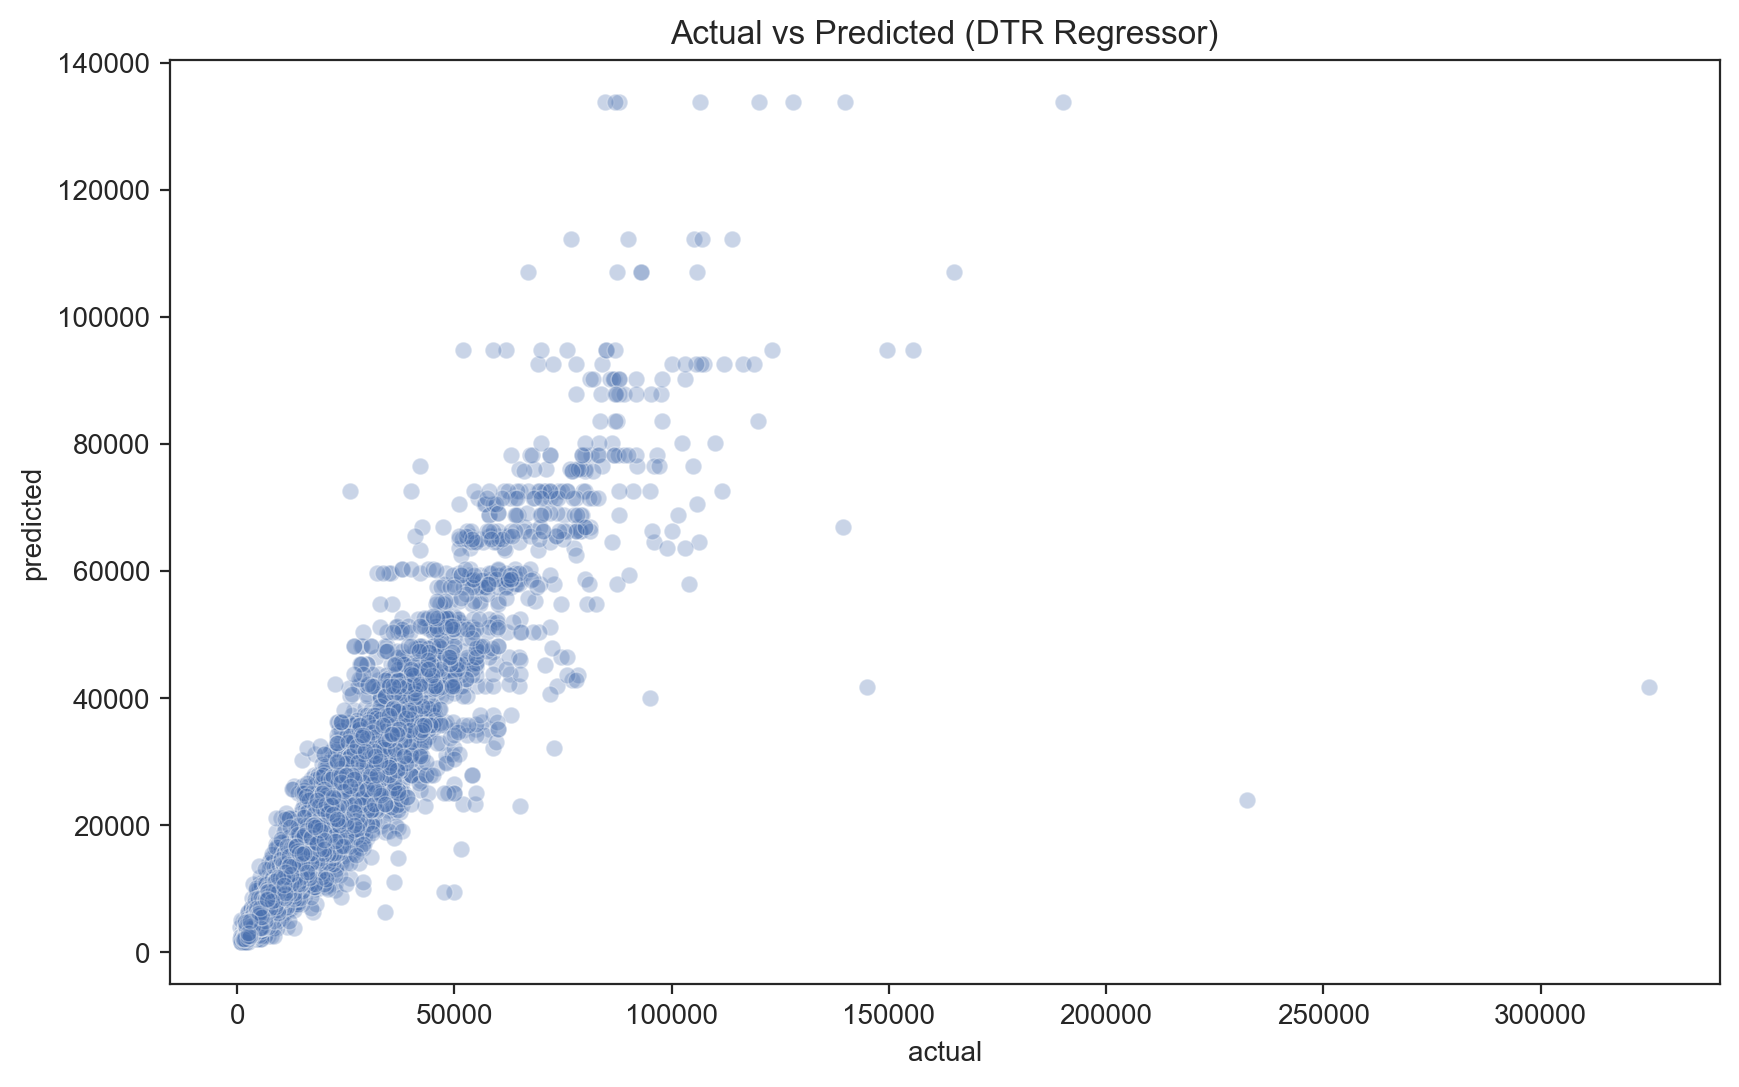

In [180]:
result = pd.DataFrame({'actual': y_test, 'predicted': bst_dtr.predict(X_test)})
plt.figure(figsize=(10,6));
sns.scatterplot(data = result, x='actual', y='predicted', alpha=0.3);
plt.title('Actual vs Predicted (DTR Regressor)');
plt.show();

In [181]:

feat_importances = bst_tree_reg.feature_importances_

importance_df = pd.DataFrame(
    {'Feature': X.columns, 
     'Importance value': feat_importances}
)
importance_df = importance_df.sort_values('Importance value', ascending=False)

importance_df

,Feature,Importance value
6,body_type,0.634595
1,standard_colour,0.161110
0,mileage,0.130155
5,year_of_registration,0.031624
3,standard_model,0.020363
8,vehicle_age,0.011048
7,fuel_type,0.008199
2,standard_make,0.002233
4,vehicle_condition,0.000396
9,mileage_per_year,0.000277


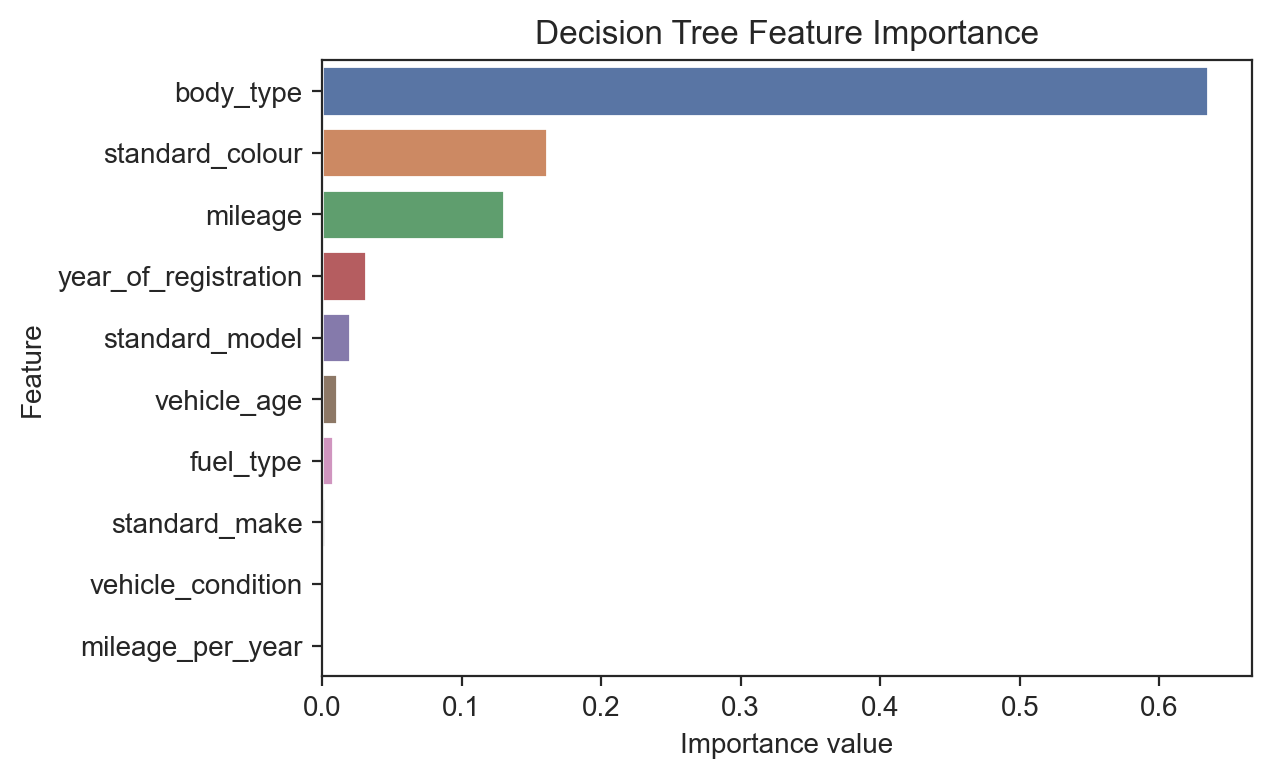

In [182]:
sns.barplot(data=importance_df, x="Importance value", y="Feature");
plt.title('Decision Tree Feature Importance');
plt.show();

#### LINEAR REGRESSION

#### LR Using Pipeline

In [183]:
samp_car_df.corr()

,mileage,year_of_registration,price,vehicle_age,mileage_per_year
mileage,1.000000,-0.784938,-0.460998,0.784938,0.830987
year_of_registration,-0.784938,1.000000,0.543799,-1.000000,-0.434650
price,-0.460998,0.543799,1.000000,-0.543799,-0.360047
vehicle_age,0.784938,-1.000000,-0.543799,1.000000,0.434650
mileage_per_year,0.830987,-0.434650,-0.360047,0.434650,1.000000


In [184]:
comm = pd.concat([X_train_pro, y_train], axis=1)

comm.corr()

,num__mileage,num__year_of_registration,num__mileage_per_year,num__vehicle_age,cat_oh__vehicle_condition_USED,cat_te__standard_make,cat_te__standard_model,cat_te__body_type,cat_te__fuel_type,cat_te__standard_colour,price
num__mileage,1.000000,-0.786170,0.831483,0.786170,0.306267,0.033360,-0.125942,-0.044918,-0.017390,-0.037862,-0.462575
num__year_of_registration,-0.786170,1.000000,-0.437485,-1.000000,-0.397734,0.061567,0.224266,0.133317,0.113917,0.098580,0.545387
num__mileage_per_year,0.831483,-0.437485,1.000000,0.437485,0.386432,0.065279,-0.073411,0.000998,0.015007,0.001421,-0.360907
num__vehicle_age,0.786170,-1.000000,0.437485,1.000000,0.397734,-0.061567,-0.224266,-0.133317,-0.113917,-0.098580,-0.545387
cat_oh__vehicle_condition_USED,0.306267,-0.397734,0.386432,0.397734,1.000000,-0.049598,-0.164504,-0.081892,-0.111559,-0.046876,-0.375166
cat_te__standard_make,0.033360,0.061567,0.065279,-0.061567,-0.049598,1.000000,0.672406,0.373147,0.189154,0.134539,0.513107
cat_te__standard_model,-0.125942,0.224266,-0.073411,-0.224266,-0.164504,0.672406,1.000000,0.509105,0.251120,0.144582,0.777363
cat_te__body_type,-0.044918,0.133317,0.000998,-0.133317,-0.081892,0.373147,0.509105,1.000000,0.143133,0.106859,0.388788
cat_te__fuel_type,-0.017390,0.113917,0.015007,-0.113917,-0.111559,0.189154,0.251120,0.143133,1.000000,0.057853,0.255049
cat_te__standard_colour,-0.037862,0.098580,0.001421,-0.098580,-0.046876,0.134539,0.144582,0.106859,0.057853,1.000000,0.151784


In [185]:
lr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("Lin_reg", LinearRegression())
    ]
)

In [186]:
lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'mileage_per_year',
                                                   'vehicle_age']),
                                                 ('cat_oh',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['vehicle_condition']),
                                                 ('cat_te',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder(shuffle=False,
                                                                                 target_type='continuous')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'body_type', 'fuel_type',
                                                   'standard_colour'])])),
                ('Lin_reg', LinearRegression())])

In [187]:
lr.score(X_test, y_test), lr.score(X_train, y_train)

(0.760001531624886, 0.7936638889656464)

In [188]:
cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-3605.69842141, -3580.2587468 , -3634.36163599])

In [189]:
cross_val_score(lr, X_test, y_test, scoring='neg_mean_absolute_error', cv=3)

array([-3735.84768696, -3763.09873834, -3648.77358749])

In [190]:
y_pred = lr.predict(X_test)

In [191]:
print("MAE on test:", mean_absolute_error(y_test, y_pred) )

print("MAE on train:", mean_absolute_error(y_train, lr.predict(X_train)) )

MAE on test: 3614.8827939294206
MAE on train: 3555.2428736869906


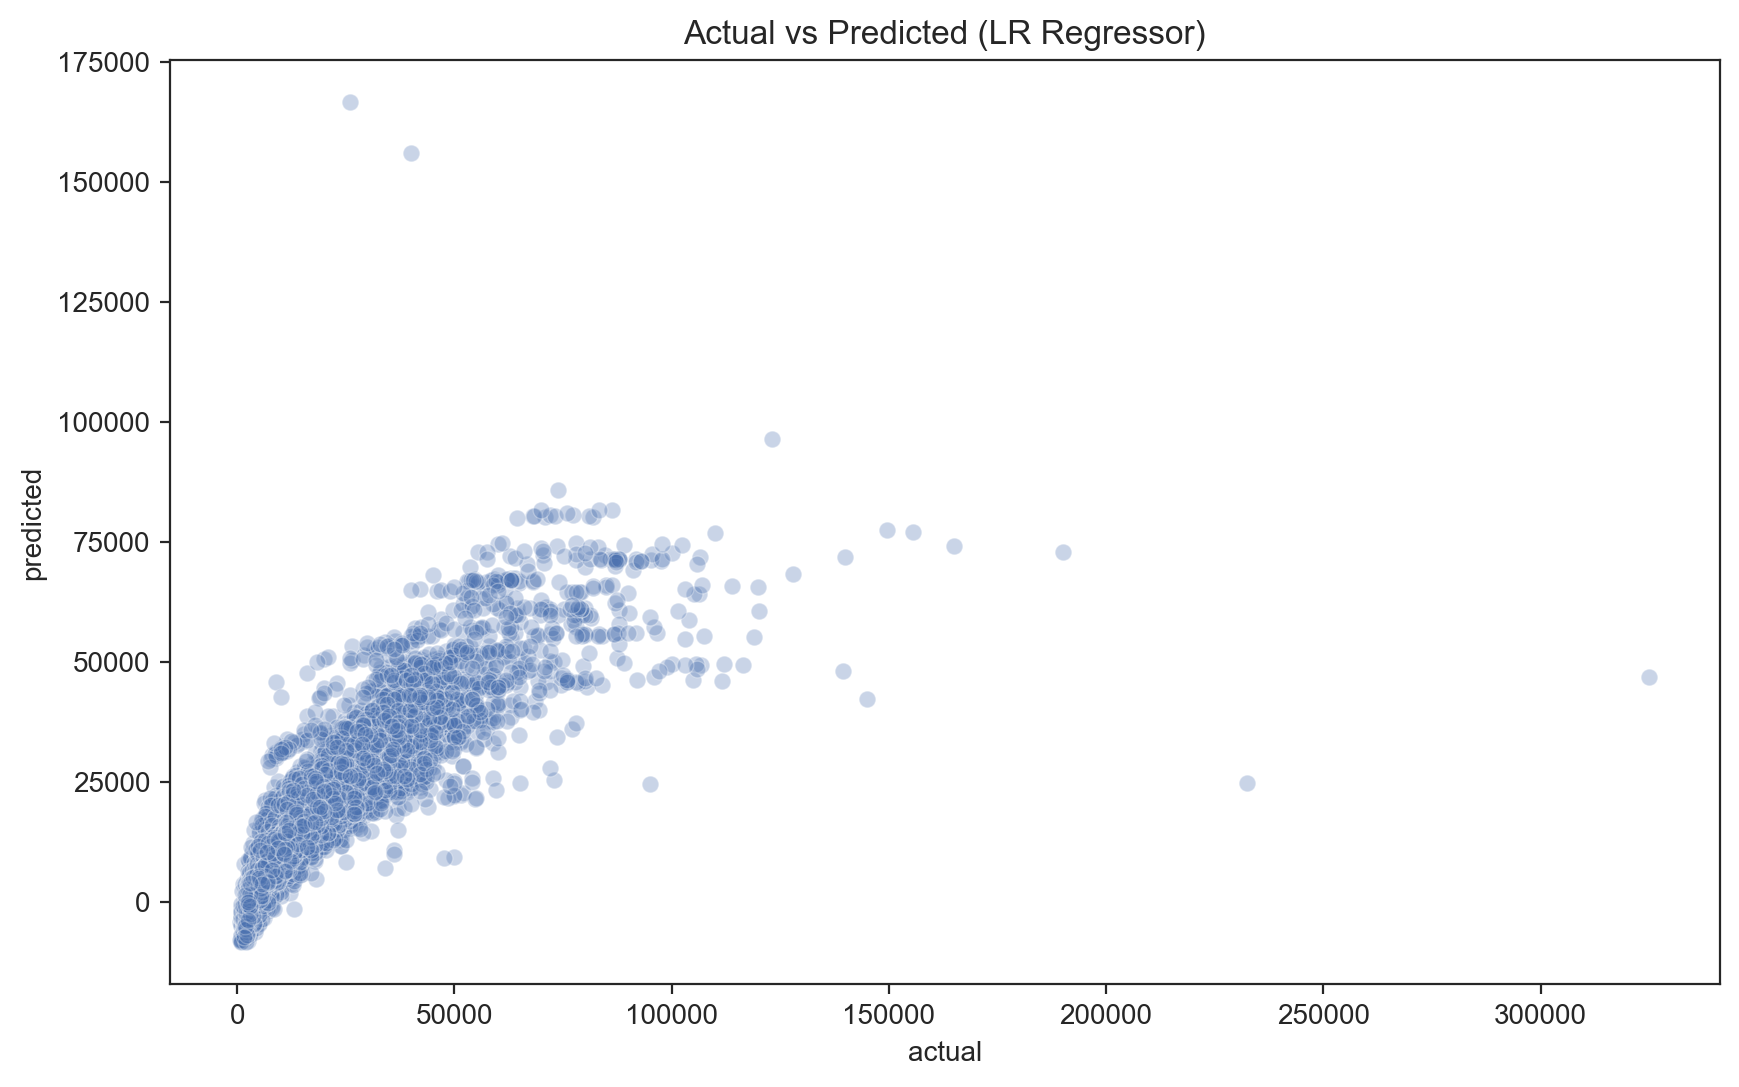

In [192]:
result = pd.DataFrame({'actual': y_test, 'predicted': lr.predict(X_test)})

plt.figure(figsize=(10,6));
sns.scatterplot(data = result, x='actual', y='predicted', alpha=0.3);
plt.title('Actual vs Predicted (LR Regressor)');
plt.show();

In [193]:
X_train.columns

Index(['mileage', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'year_of_registration', 'body_type', 'fuel_type',
       'vehicle_age', 'mileage_per_year'],
      dtype='object')

In [194]:
print("coefficient :" , lr.named_steps['Lin_reg'].coef_ )
print("intercept :", lr.named_steps['Lin_reg'].intercept_)


coefficient : [ 2.54118402e+03 -8.40346055e+15 -2.84049414e+04 -8.40346055e+15
 -4.58371772e+03  4.09077172e+03  1.06667523e+05 -1.14589711e+03
  4.77364101e+03  3.59931317e+03]
intercept : 8403460548491907.0


In [195]:
lr_feat_imp = pd.DataFrame(
    {"Features" : X_train.columns,
     "Coefficient":lr.named_steps['Lin_reg'].coef_}
).sort_values("Coefficient", ascending=False)

lr_feat_imp

,Features,Coefficient
6,body_type,1.066675e+05
8,vehicle_age,4.773641e+03
5,year_of_registration,4.090772e+03
9,mileage_per_year,3.599313e+03
0,mileage,2.541184e+03
7,fuel_type,-1.145897e+03
4,vehicle_condition,-4.583718e+03
2,standard_make,-2.840494e+04
1,standard_colour,-8.403461e+15
3,standard_model,-8.403461e+15


In [196]:
y_test.head().to_numpy()

array([14195,  2790, 15895,  9999,  9639], dtype=int64)

In [197]:
y_pred[0:5]

array([12476., -2597., 15641., 15645., 10158.])

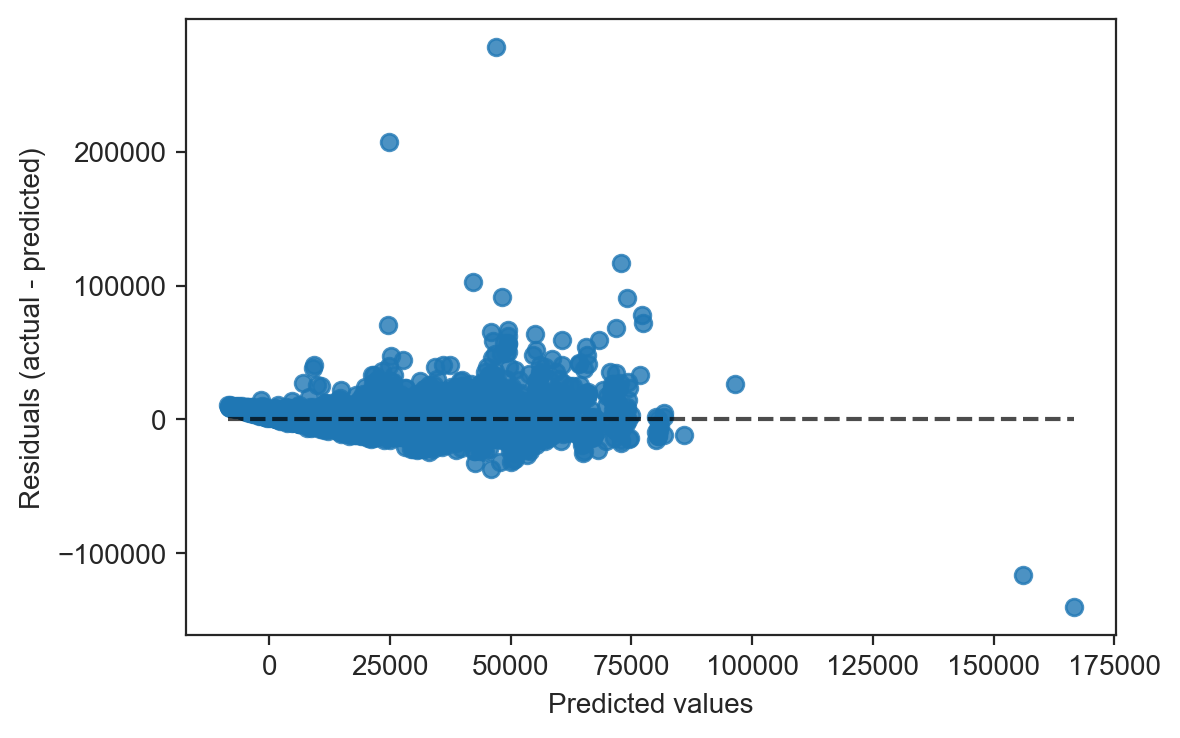

In [198]:
PredictionErrorDisplay(y_true = y_test , y_pred = y_pred).plot();

In [199]:
residuals = y_pred - y_test
residuals.max()

140602.0

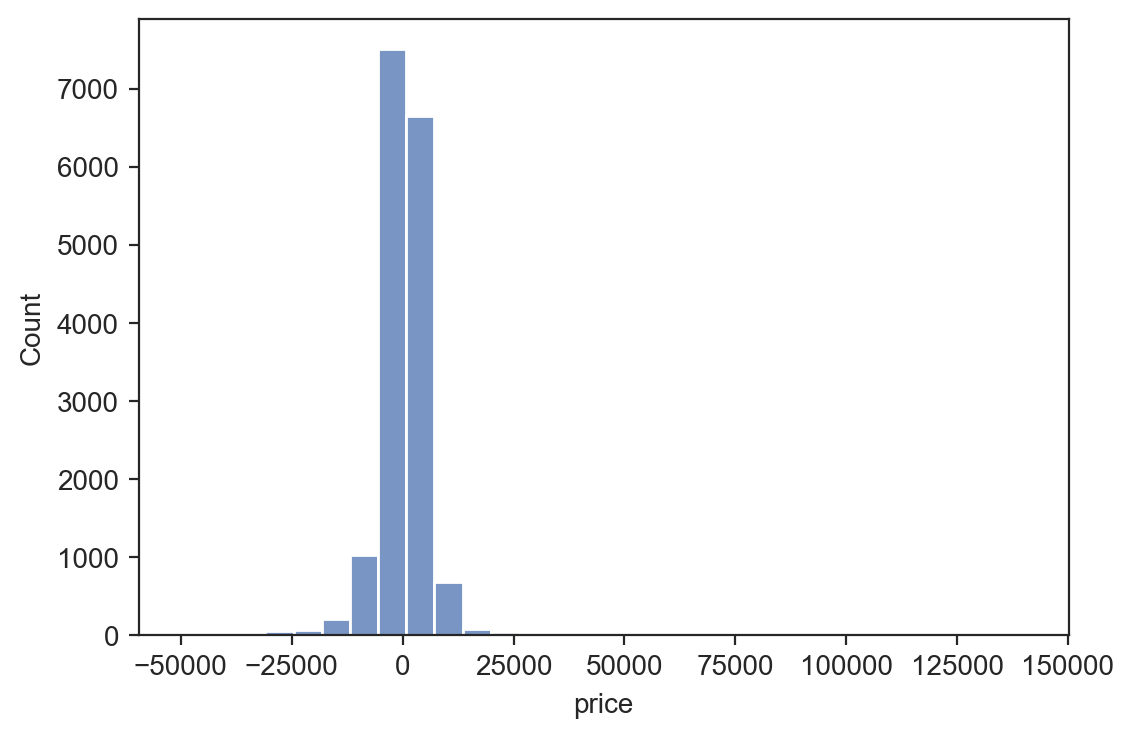

In [200]:
sns.histplot(residuals, bins=30, binrange=(-50000, max(residuals)));

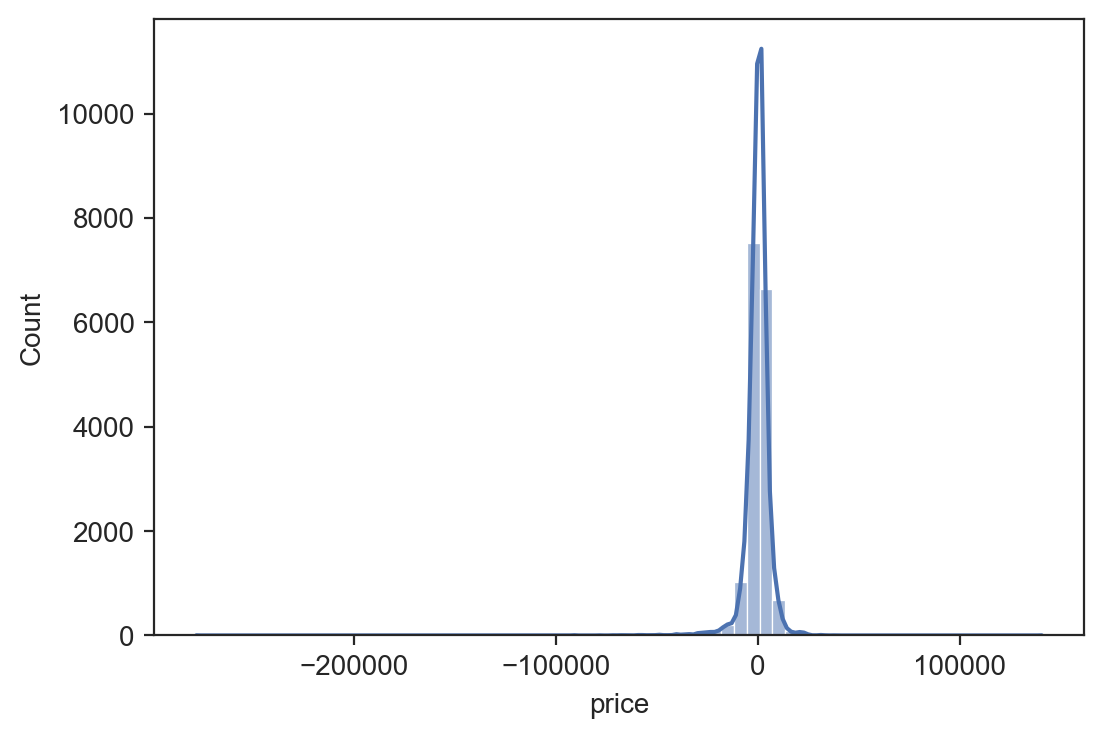

In [201]:
sns.histplot(residuals, bins=30, binrange=(-50000, max(residuals)), kde=True);

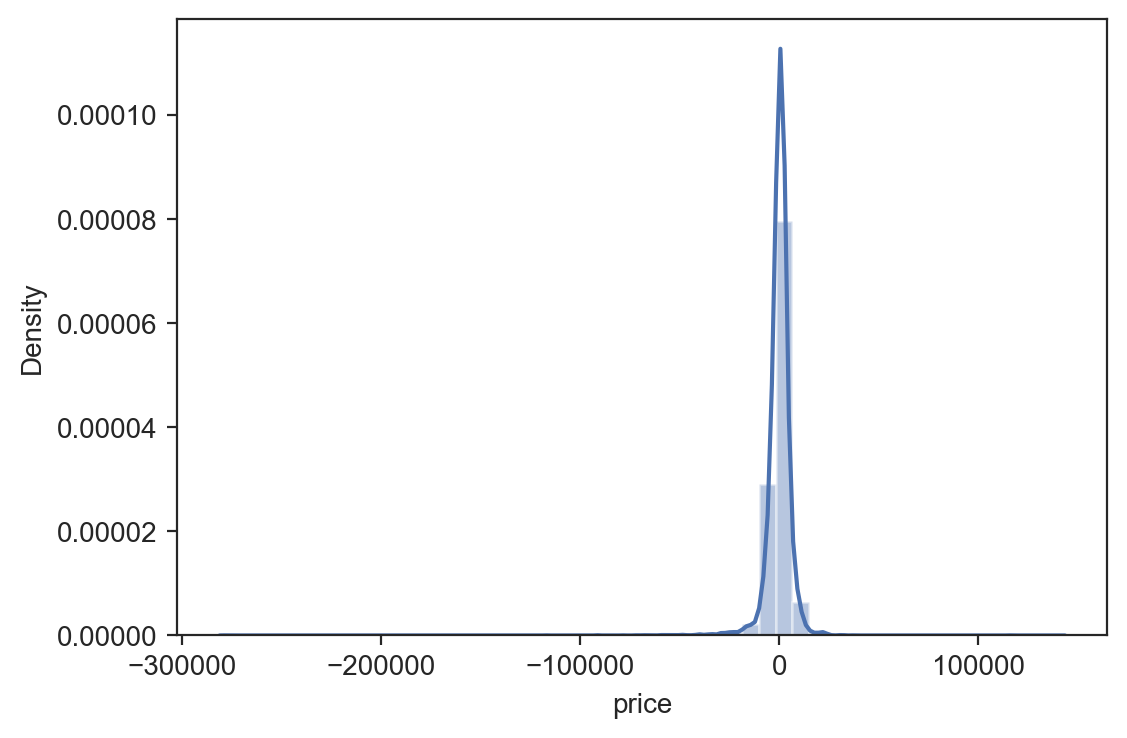

In [202]:
sns.distplot(residuals);

In [203]:
columns = ["model","Best Parameter","Train Scores", "Test Scores"]
data = [
    ["KNN Regressor", knn_res.best_params_,  bst_knnr.score(X_train, y_train), bst_knnr.score(X_test, y_test)],
    ["DTR Regressor", grs_res.best_params_,  bst_dtr.score(X_train, y_train), bst_dtr.score(X_test, y_test)],
    ["Linear Regression", "______",  lr.score(X_test, y_test), lr.score(X_train, y_train)]
     
]

In [204]:
pd.DataFrame(data, columns=columns)

,model,Best Parameter,Train Scores,Test Scores
0,KNN Regressor,"{'KNN_regressor__n_neighbors': 9, 'KNN_regress...",0.955902,0.859678
1,DTR Regressor,"{'DTR_regressor__max_depth': 11, 'DTR_regresso...",0.896080,0.863266
2,Linear Regression,______,0.760002,0.793664


In [205]:
columns = ["model", "Best Parameter", "Train Scores", "Test Scores", "Train MAE", "Test MAE"]
data = [
    [
        "KNN Regressor", knn_res.best_params_,  
     bst_knnr.score(X_train, y_train), 
     bst_knnr.score(X_test, y_test), 
     mean_absolute_error(y_train, bst_knnr.predict(X_train)), 
     mean_absolute_error(y_test, bst_knnr.predict(X_test))
    ],
    [
        "DTR Regressor", 
        grs_res.best_params_,  
        bst_dtr.score(X_train, y_train), 
        bst_dtr.score(X_test, y_test), 
        mean_absolute_error(y_train, bst_dtr.predict(X_train)), 
        mean_absolute_error(y_test, bst_dtr.predict(X_test))
    ], 
    [
        "Linear Regression", 
        "______",  
        lr.score(X_test, y_test), 
        lr.score(X_train, y_train), 
        mean_absolute_error(y_train, lr.predict(X_train)), 
        mean_absolute_error(y_test, lr.predict(X_test))
    ]
     
]

In [206]:
pd.DataFrame(data, columns=columns)

,model,Best Parameter,Train Scores,Test Scores,Train MAE,Test MAE
0,KNN Regressor,"{'KNN_regressor__n_neighbors': 9, 'KNN_regress...",0.955902,0.859678,1234.619839,2372.803871
1,DTR Regressor,"{'DTR_regressor__max_depth': 11, 'DTR_regresso...",0.896080,0.863266,2208.346773,2374.148419
2,Linear Regression,______,0.760002,0.793664,3555.242874,3614.882794
